In [ ]:
!git clone https://github.com/Trung-Logarit/GaitSetv1.git

Cloning into 'GaitSetv1'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 137 (delta 28), reused 1 (delta 0), pack-reused 64 (from 2)
Receiving objects: 100% (137/137), 245.56 MiB | 14.77 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (57/57), done.


In [ ]:
#!pip install torch==1.13.0


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
from google.colab import files
files.upload()  # Chọn file kaggle.json để tải lên


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"logarit","key":"41472e72ca22556c9ab105537fd5a053"}'}

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d logarit/casia-b-pretreament


Dataset URL: https://www.kaggle.com/datasets/logarit/casia-b-pretreament
License(s): CC0-1.0
 98% 800M/820M [00:07<00:00, 51.0MB/s]
100% 820M/820M [00:07<00:00, 119MB/s] 


In [ ]:
!unzip /content/casia-b-pretreament.zip -d /content/dataset/


In [ ]:
!pip install imageio


In [ ]:
%cd /content/GaitSetv1/

/content/GaitSetv1


In [ ]:
!python test.py

Initialzing...
Initializing data source...
Data initialization complete.
Initializing model...
Model initialization complete.
Loading the model of iteration 50000...
Transforming...
Evaluating...
Evaluation complete. Cost: 0:01:39.126218
===Rank-1 (Include identical-view cases)===
NM: 94.886,	BG: 88.618,	CL: 68.354
===Rank-1 (Exclude identical-view cases)===
NM: 94.375,	BG: 87.609,	CL: 66.570
===Rank-1 of each angle (Exclude identical-view cases)===
NM: [91.04 96.60 99.06 97.26 92.83 91.51 94.34 97.26 97.55 96.60 84.06]
BG: [84.53 90.47 93.02 89.43 84.15 80.47 84.62 91.32 93.11 91.62 80.94]
CL: [64.53 72.64 77.17 71.23 63.59 61.70 64.91 69.53 71.13 65.47 50.38]


In [ ]:
!python test.py

Initialzing...
Initializing data source...
Data initialization complete.
Initializing model...
Model initialization complete.
Loading the model of iteration 60000...
Transforming...
Evaluating...
Evaluation complete. Cost: 0:01:30.806800
===Rank-1 (Include identical-view cases)===
NM: 95.104,	BG: 88.320,	CL: 67.605
===Rank-1 (Exclude identical-view cases)===
NM: 94.614,	BG: 87.238,	CL: 65.918
===Rank-1 of each angle (Exclude identical-view cases)===
NM: [91.13 98.30 99.15 97.36 91.42 90.85 94.43 97.36 98.49 97.17 85.09]
BG: [83.59 90.66 92.92 89.24 83.21 80.57 84.72 92.45 93.59 89.52 79.15]
CL: [63.02 72.45 75.66 71.51 64.34 62.17 65.38 68.11 69.81 63.21 49.43]


In [ ]:
# Load model
import sys
import os
import torch # Import torch as it's used internally by model loading
from model.initialization import initialization
from config import conf

# Ensure we are in the correct directory
%cd /content/GaitSetv1/

conf['WORK_PATH'] = './work'
os.makedirs(conf['WORK_PATH'], exist_ok=True)

# Check if the checkpoint file exists before attempting to load
checkpoint_path = os.path.join(
    conf['WORK_PATH'], # The base path for work/checkpoint
    'checkpoint',
    'GaitSet', # Assuming self.model_name is 'GaitSet'
    'GaitSet_CASIA-B_70_False_256_0.2_128_full_30-50000-encoder.ptm' # Construct the full expected path
)

print(f"Checking for checkpoint file: {checkpoint_path}")
if not os.path.exists(checkpoint_path):
    print(f"[ERROR] Checkpoint file not found at: {checkpoint_path}")
    print("Please ensure the model was trained or the checkpoint was downloaded correctly.")
else:
    print(f"[INFO] Checkpoint file found.")
    model_wrapper = initialization(conf, test=False)[0]

    # Load the state dict directly using the full path if needed,
    # or trust the model_wrapper.load method if the base directory is correct.
    # The model.py load method uses a relative path from the current working directory.
    # Since we are now in /content/GaitSetv1, the relative path 'checkpoint/...' should work.
    model_wrapper.load(50000) # This method expects the iteration number

    print("[OK] Model đã load xong checkpoint")

/content/GaitSetv1
Checking for checkpoint file: ./work/checkpoint/GaitSet/GaitSet_CASIA-B_70_False_256_0.2_128_full_30-50000-encoder.ptm
[INFO] Checkpoint file found.
Initialzing...
Initializing data source...
Data initialization complete.
Initializing model...
Model initialization complete.
[OK] Model đã load xong checkpoint


In [ ]:
# modify model/initialization.py
def initialize_data(config, train=False, test=False):
    print("Initializing data source...")
    # Extract data config, removing num_workers which is model config
    data_config = config['data'].copy()
    if 'num_workers' in data_config:
        del data_config['num_workers'] # Remove num_workers from data_config
    train_source, test_source = load_data(**data_config, cache=(train or test)) # Pass modified config
    if train:
        print("Loading training data...")
        # Assuming train_source is an instance that accepts num_workers
        # If not, you might need to pass it to a DataLoader constructor later
        # This part depends on the structure of train_source/test_source objects
        # if hasattr(train_source, 'set_num_workers'):
        #     train_source.set_num_workers(config['model']['num_workers'])
        pass # num_workers is handled when creating DataLoader
    if test:
        print("Loading testing data...")
        # Similarly for test_source
        # if hasattr(test_source, 'set_num_workers'):
        #     test_source.set_num_workers(config['model']['num_workers'])
        pass # num_workers is handled when creating DataLoader
    return train_source, test_source

In [ ]:
# Load model
import sys
import os
from model.initialization import initialization
from config import conf
import torch # Import torch

# Assume you have 'model_wrapper' from the loading step
# The loading step should be in a cell before this one and should look like this:
# conf['WORK_PATH'] = './work'
# os.makedirs(conf['WORK_PATH'], exist_ok=True)
# model_wrapper = initialization(conf, test=False)[0]  # or test=False
# model_wrapper.load(50000)
# print("[OK] Model đã load xong checkpoint")

# Define BATCH_SIZE
BATCH_SIZE = 32    # or the batch_size you are using

# 1) Get arrays from transform using model_wrapper
features, views, seqs, labels = model_wrapper.transform('test', BATCH_SIZE)

# 2) Print information
# Need to import numpy for np.array and np.unique
import numpy as np

print("features.shape =", np.array(features).shape)
print("unique views =", sorted(list(set(views))))
print("unique seq_types =", sorted(list(set(seqs)))[:10], "... total", len(set(seqs)))
print("unique labels =", sorted(list(set(labels)))[:20], "... total", len(set(labels)))

features.shape = (5815, 15872)
unique views = ['000', '018', '036', '054', '072', '090', '108', '126', '144', '162', '180']
unique seq_types = ['bg-01', 'bg-02', 'cl-01', 'cl-02', 'nm-01', 'nm-02', 'nm-03', 'nm-04', 'nm-05', 'nm-06'] ... total 10
unique labels = ['072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091'] ... total 53


In [ ]:
# Single Jupyter cell: 11×11 Rank‑1 (Euclid & Cosine) for subjects 071–080

import os
import numpy as np
import torch
import torch.nn.functional as F
from model.initialization import initialization
from config import conf

# ── Setup work directory and repo root ──
repo_root = '/content/GaitSetv1'
os.chdir(repo_root)
conf['WORK_PATH'] = os.path.join(repo_root, 'work')
os.makedirs(conf['WORK_PATH'], exist_ok=True)

# ── Settings ──
ITER = 50000
BATCH_SIZE = 32

# ── Load model and checkpoint ──
model = initialization(conf, test=True)[0]
model.load(ITER)
print(f"Model loaded (iter={ITER}).")

# ── Transform to get features + metadata ──
features, views, seqs, labels = model.transform('test', BATCH_SIZE)
features = np.array(features)
views    = np.array(views)
seqs     = np.array(seqs)
labels   = np.array(labels)

# ── Define desired test IDs and filter those present ──
desired_ids = [f"{i:03d}" for i in range(71, 81)]
test_ids = [sid for sid in desired_ids if sid in labels]
print("Evaluating subjects:", test_ids)

# ── Prepare view list and sequence splits ──
view_list    = sorted(set(views))  # ['000','018',...,'180']
probe_seqs   = ['nm-05','nm-06','bg-01','bg-02','cl-01','cl-02']
gallery_seqs = ['nm-01','nm-02','nm-03','nm-04']

# ── Distance / similarity functions ──
def euclid_dist(x_np, y_np):
    x = torch.from_numpy(x_np)
    y = torch.from_numpy(y_np)
    if torch.cuda.is_available():
        x, y = x.cuda(), y.cuda()
    dist = (torch.sum(x**2, dim=1).unsqueeze(1)
          + torch.sum(y**2, dim=1).unsqueeze(1).transpose(0,1)
          - 2 * torch.matmul(x, y.transpose(0,1)))
    dist = torch.sqrt(F.relu(dist))
    return dist.cpu().numpy()

def cosine_sim(x_np, y_np):
    x_norm = x_np / np.linalg.norm(x_np, axis=1, keepdims=True)
    y_norm = y_np / np.linalg.norm(y_np, axis=1, keepdims=True)
    return x_norm @ y_norm.T

# ── Compute and print 11×11 rank‑1 matrices ──
for sid in test_ids:
    # Probe of this subject
    mask_sid = (labels == sid)
    feat_s   = features[mask_sid]
    view_s   = views[mask_sid]
    seq_s    = seqs[mask_sid]
    lab_s    = labels[mask_sid]

    V = len(view_list)
    M_euc = np.zeros((V, V), dtype=float)
    M_cos = np.zeros((V, V), dtype=float)

    for i, vp in enumerate(view_list):
        # probe samples at this view
        m_p = np.isin(seq_s, probe_seqs) & (view_s == vp)
        xp = feat_s[m_p]
        lp = lab_s[m_p]

        for j, vg in enumerate(view_list):
            # gallery from all subjects at view vg
            m_g = np.isin(seqs, gallery_seqs) & (views == vg)
            xg = features[m_g]
            lg = labels[m_g]

            if xp.size == 0 or xg.size == 0:
                M_euc[i, j] = np.nan
                M_cos[i, j] = np.nan
            else:
                # Euclidean top-1 accuracy
                d = euclid_dist(xp, xg)
                idx = d.argmin(axis=1)
                M_euc[i, j] = 100 * np.mean(lp == lg[idx])
                # Cosine top-1 accuracy
                sim = cosine_sim(xp, xg)
                idx2 = sim.argmax(axis=1)
                M_cos[i, j] = 100 * np.mean(lp == lg[idx2])

    print(f"\nSubject {sid} – rank‑1 11×11 matrix (rows=probe°, cols=gallery°):")
    print("Euclidean (%):\n", np.round(M_euc, 2))
    print("Cosine    (%):\n", np.round(M_cos, 2))


Initialzing...
Initializing data source...
Loading test data...
Data initialization complete.
Initializing model...
Model initialization complete.
Model loaded (iter=50000).
Evaluating subjects: ['072', '073', '074', '075', '076', '077', '078', '079', '080']

Subject 072 – rank‑1 11×11 matrix (rows=probe°, cols=gallery°):
Euclidean (%):
 [[100.   100.   100.   100.   100.    83.33 100.    66.67 100.   100.
  100.  ]
 [100.   100.   100.   100.   100.   100.   100.    83.33 100.   100.
   66.67]
 [100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
   83.33]
 [100.   100.   100.   100.   100.    83.33 100.   100.    83.33 100.
   33.33]
 [100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
   33.33]
 [ 83.33 100.   100.   100.   100.   100.   100.   100.   100.   100.
   33.33]
 [100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
   66.67]
 [100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
  100.  ]
 [100.   100.   100.

In [ ]:
# Cell 1: Setup path, load model and extract features

import os, sys
# 1) Định vị repo và thêm vào Python path
repo_root = '/content/GaitSetv1'
os.chdir(repo_root)
sys.path.insert(0, repo_root)

# 2) Imports
import numpy as np
import torch
from model.initialization import initialization
from config import conf

# 3) Thiết lập WORK_PATH
conf['WORK_PATH'] = os.path.join(repo_root, 'work')
os.makedirs(conf['WORK_PATH'], exist_ok=True)

# 4) Thông số
ITER = 50000
BATCH_SIZE = 32

# 5) Load model + checkpoint
model = initialization(conf, test=True)[0]
model.load(ITER)
print(f"Đã load model checkpoint iter={ITER}")

# 6) Transform để lấy features + metadata
features, views, seqs, labels = model.transform('test', BATCH_SIZE)
features = np.array(features)
views    = np.array(views)
seqs     = np.array(seqs)
labels   = np.array(labels)


Initialzing...
Initializing data source...
Loading test data...
Data initialization complete.
Initializing model...
Model initialization complete.
Đã load model checkpoint iter=50000


In [ ]:
# Cell 2: Tạo và hiển thị bảng rank-1 11×11 (Euclid & Cosine) với Pandas

import numpy as np
import pandas as pd
from IPython.display import display

# Chuẩn bị
test_ids    = [f"{i:03d}" for i in range(71, 81) if f"{i:03d}" in set(labels)]
view_list   = sorted(set(views))
probe_seqs  = ['nm-05','nm-06','bg-01','bg-02','cl-01','cl-02']
gallery_seqs= ['nm-01','nm-02','nm-03','nm-04']

# Khoảng cách Euclid và Cosine
def euclid_dist_np(x_np, y_np):
    diff = x_np[:, None, :] - y_np[None, :, :]
    return np.sqrt(np.sum(diff**2, axis=2))

def cosine_sim_np(x_np, y_np):
    x_norm = x_np / np.linalg.norm(x_np, axis=1, keepdims=True)
    y_norm = y_np / np.linalg.norm(y_np, axis=1, keepdims=True)
    return x_norm @ y_norm.T

for sid in test_ids:
    V = len(view_list)
    M_euc = np.zeros((V, V), dtype=float)
    M_cos = np.zeros((V, V), dtype=float)

    # Tính ma trận
    for i, vp in enumerate(view_list):
        mask_p = (labels == sid) & np.isin(seqs, probe_seqs) & (views == vp)
        xp, lp = features[mask_p], labels[mask_p]
        for j, vg in enumerate(view_list):
            mask_g = np.isin(seqs, gallery_seqs) & (views == vg)
            xg, lg = features[mask_g], labels[mask_g]
            if xp.size and xg.size:
                # Euclid rank-1
                d    = euclid_dist_np(xp, xg)
                idx  = np.argmin(d, axis=1)
                M_euc[i,j] = 100 * np.mean(lp == lg[idx])
                # Cosine rank-1
                sim  = cosine_sim_np(xp, xg)
                idx2 = np.argmax(sim, axis=1)
                M_cos[i,j] = 100 * np.mean(lp == lg[idx2])
            else:
                M_euc[i,j] = np.nan
                M_cos[i,j] = np.nan

    # Hiển thị 2 bảng
    print(f"\n--- Subject {sid} ---")
    print("Euclidean (%)")
    df_e = pd.DataFrame(M_euc, index=view_list, columns=view_list)
    # đặt tên hàng/cột cho rõ
    df_e.index.name = 'probe_view'
    df_e.columns.name = 'gallery_view'
    display(df_e.round(2))

    print("Cosine (%)")
    df_c = pd.DataFrame(M_cos, index=view_list, columns=view_list)
    df_c.index.name = 'probe_view'
    df_c.columns.name = 'gallery_view'
    display(df_c.round(2))



--- Subject 072 ---
Euclidean (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,100.0,100.00,100.00,100.00,83.33,100.00,66.67,100.00,100.0,100.00
018,100.00,100.0,100.00,100.00,100.00,100.00,100.00,83.33,100.00,100.0,66.67
036,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,83.33
054,100.00,100.0,100.00,100.00,100.00,83.33,100.00,100.00,83.33,100.0,33.33
072,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,33.33
090,83.33,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,33.33
108,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,66.67
126,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,100.00
144,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,100.00


Cosine (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,100.0,100.00,100.00,100.00,83.33,100.00,100.0,100.0,100.0,100.00
018,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.0,100.0,100.0,66.67
036,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.0,100.0,100.0,66.67
054,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.0,100.0,100.0,33.33
072,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.0,100.0,100.0,33.33
090,50.00,100.0,100.00,100.00,100.00,100.00,100.00,100.0,100.0,100.0,33.33
108,83.33,100.0,100.00,100.00,100.00,100.00,100.00,100.0,100.0,100.0,50.00
126,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.0,100.0,100.0,100.00
144,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.0,100.0,100.0,100.00



--- Subject 073 ---
Euclidean (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,83.33,83.33,100.00,83.33,83.33,83.33,83.33,66.67,66.67,66.67
018,83.33,100.00,100.00,100.00,100.00,83.33,83.33,83.33,66.67,66.67,66.67
036,83.33,83.33,100.00,100.00,83.33,83.33,83.33,83.33,83.33,66.67,66.67
054,66.67,66.67,100.00,100.00,83.33,83.33,66.67,66.67,66.67,66.67,33.33
072,50.00,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,33.33,0.00
090,50.00,66.67,66.67,66.67,100.00,100.00,83.33,66.67,66.67,50.00,16.67
108,66.67,66.67,100.00,83.33,100.00,100.00,83.33,66.67,66.67,66.67,33.33
126,66.67,66.67,83.33,66.67,100.00,83.33,66.67,66.67,66.67,66.67,50.00
144,66.67,66.67,83.33,83.33,83.33,83.33,83.33,66.67,66.67,66.67,66.67


Cosine (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,100.00,100.00,100.00,100.00,100.00,83.33,83.33,83.33,66.67,100.00
018,83.33,100.00,100.00,100.00,100.00,83.33,100.00,83.33,83.33,66.67,66.67
036,100.00,100.00,100.00,100.00,100.00,83.33,83.33,83.33,83.33,66.67,66.67
054,100.00,100.00,100.00,100.00,83.33,83.33,83.33,66.67,83.33,66.67,33.33
072,66.67,66.67,83.33,83.33,83.33,66.67,66.67,66.67,66.67,50.00,16.67
090,66.67,66.67,100.00,100.00,100.00,100.00,83.33,66.67,66.67,50.00,16.67
108,66.67,83.33,100.00,100.00,100.00,100.00,100.00,83.33,100.00,66.67,33.33
126,66.67,83.33,100.00,100.00,100.00,83.33,100.00,66.67,66.67,66.67,33.33
144,66.67,83.33,100.00,100.00,83.33,83.33,83.33,66.67,83.33,66.67,66.67



--- Subject 074 ---
Euclidean (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,66.67,50.00,33.33,33.33,16.67,16.67,50.00,50.00,66.67,83.33
018,100.00,100.00,100.00,83.33,83.33,50.00,66.67,83.33,100.00,100.00,66.67
036,83.33,100.00,100.00,100.00,100.00,83.33,100.00,100.00,100.00,100.00,66.67
054,66.67,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,66.67
072,66.67,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,50.00
090,66.67,83.33,83.33,100.00,100.00,100.00,100.00,100.00,100.00,100.00,33.33
108,50.00,83.33,83.33,100.00,100.00,100.00,100.00,100.00,100.00,100.00,66.67
126,66.67,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,66.67
144,66.67,100.00,83.33,83.33,100.00,83.33,100.00,100.00,100.00,100.00,83.33


Cosine (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,50.00,50.00,16.67,0.00,16.67,16.67,33.33,50.00,66.67,83.33
018,83.33,100.00,100.00,66.67,66.67,50.00,50.00,100.00,100.00,83.33,66.67
036,83.33,100.00,100.00,100.00,100.00,83.33,100.00,100.00,83.33,83.33,66.67
054,50.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,66.67
072,50.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,50.00
090,66.67,83.33,83.33,83.33,100.00,100.00,100.00,100.00,100.00,100.00,33.33
108,33.33,83.33,83.33,83.33,100.00,100.00,100.00,100.00,100.00,100.00,66.67
126,66.67,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,50.00
144,50.00,100.00,83.33,83.33,100.00,100.00,100.00,100.00,100.00,100.00,66.67



--- Subject 075 ---
Euclidean (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,100.00,100.00,33.33,66.67,50.00,33.33,66.67,66.67,100.0,83.33
018,100.00,100.00,100.00,100.00,66.67,50.00,66.67,83.33,100.00,100.0,100.00
036,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,100.00
054,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,83.33
072,83.33,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,50.00
090,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,83.33
108,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,33.33
126,66.67,83.33,100.00,100.00,100.00,100.00,83.33,100.00,100.00,100.0,100.00
144,100.00,100.00,83.33,50.00,50.00,100.00,16.67,100.00,100.00,100.0,100.00


Cosine (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,100.00,100.00,33.33,66.67,66.67,33.33,83.33,100.00,100.0,83.33
018,100.00,100.00,100.00,83.33,66.67,83.33,66.67,100.00,100.00,100.0,100.00
036,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,100.00
054,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,83.33
072,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,50.00
090,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,83.33
108,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,33.33
126,83.33,83.33,100.00,100.00,100.00,100.00,83.33,100.00,100.00,100.0,100.00
144,100.00,100.00,83.33,66.67,50.00,100.00,33.33,100.00,100.00,100.0,100.00



--- Subject 076 ---
Euclidean (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,100.00,83.33,33.33,33.33,33.33,33.33,33.33,33.33,50.00,100.00
018,50.00,100.00,100.00,33.33,33.33,50.00,33.33,50.00,66.67,33.33,33.33
036,33.33,66.67,100.00,66.67,33.33,66.67,50.00,66.67,50.00,33.33,33.33
054,0.00,33.33,83.33,100.00,100.00,83.33,66.67,100.00,100.00,33.33,16.67
072,0.00,33.33,33.33,100.00,100.00,100.00,100.00,100.00,50.00,33.33,0.00
090,0.00,33.33,33.33,100.00,100.00,100.00,100.00,100.00,83.33,33.33,0.00
108,0.00,33.33,33.33,100.00,100.00,100.00,100.00,100.00,83.33,33.33,0.00
126,0.00,33.33,33.33,66.67,100.00,100.00,66.67,100.00,83.33,33.33,0.00
144,16.67,33.33,66.67,33.33,66.67,100.00,66.67,100.00,100.00,33.33,33.33


Cosine (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,100.00,83.33,33.33,33.33,33.33,0.00,33.33,33.33,50.00,83.33
018,50.00,100.00,100.00,33.33,33.33,50.00,33.33,50.00,50.00,33.33,33.33
036,33.33,66.67,100.00,66.67,33.33,66.67,33.33,66.67,33.33,33.33,33.33
054,0.00,33.33,83.33,100.00,100.00,83.33,66.67,100.00,83.33,33.33,16.67
072,0.00,33.33,33.33,100.00,100.00,100.00,66.67,100.00,50.00,33.33,0.00
090,0.00,33.33,50.00,83.33,100.00,100.00,66.67,100.00,83.33,33.33,0.00
108,0.00,33.33,50.00,100.00,100.00,100.00,100.00,100.00,83.33,33.33,0.00
126,0.00,33.33,33.33,50.00,83.33,100.00,66.67,100.00,83.33,33.33,0.00
144,33.33,33.33,66.67,33.33,50.00,83.33,66.67,100.00,100.00,33.33,33.33



--- Subject 077 ---
Euclidean (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,100.00,66.67,66.67,16.67,50.00,33.33,33.33,50.00,66.67,66.67
018,100.00,100.00,100.00,83.33,83.33,83.33,83.33,66.67,66.67,66.67,83.33
036,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,83.33,83.33
054,83.33,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,66.67
072,50.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,83.33,83.33,66.67
090,16.67,66.67,100.00,100.00,100.00,100.00,100.00,100.00,83.33,66.67,50.00
108,33.33,83.33,83.33,100.00,100.00,100.00,100.00,100.00,83.33,66.67,33.33
126,66.67,50.00,66.67,100.00,100.00,100.00,100.00,100.00,83.33,66.67,66.67
144,33.33,66.67,100.00,100.00,100.00,100.00,100.00,100.00,100.00,83.33,50.00


Cosine (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,83.33,100.00,66.67,66.67,16.67,0.00,0.00,0.00,0.00,50.00,66.67
018,100.00,100.00,100.00,83.33,83.33,66.67,66.67,66.67,16.67,33.33,83.33
036,100.00,100.00,100.00,100.00,100.00,100.00,100.00,83.33,66.67,66.67,66.67
054,66.67,100.00,100.00,100.00,100.00,100.00,100.00,100.00,83.33,66.67,83.33
072,16.67,83.33,100.00,100.00,100.00,100.00,100.00,100.00,83.33,66.67,66.67
090,0.00,66.67,100.00,100.00,100.00,100.00,100.00,100.00,83.33,33.33,50.00
108,0.00,66.67,83.33,100.00,100.00,100.00,100.00,100.00,83.33,33.33,33.33
126,33.33,50.00,66.67,100.00,100.00,100.00,100.00,100.00,83.33,66.67,66.67
144,33.33,66.67,66.67,100.00,100.00,100.00,100.00,100.00,100.00,83.33,50.00



--- Subject 078 ---
Euclidean (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
018,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
036,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
054,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
072,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
090,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
108,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
126,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
144,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67


Cosine (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
018,66.67,66.67,66.67,66.67,66.67,66.67,66.67,83.33,83.33,66.67,66.67
036,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
054,66.67,66.67,66.67,66.67,66.67,66.67,66.67,83.33,83.33,66.67,66.67
072,66.67,66.67,66.67,66.67,66.67,66.67,66.67,83.33,66.67,66.67,66.67
090,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
108,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
126,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
144,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67



--- Subject 079 ---
Euclidean (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,66.67,83.33,66.67,66.67,16.67,16.67,100.00,100.00,83.33,100.00
018,100.00,100.00,100.00,100.00,100.00,66.67,100.00,100.00,100.00,100.00,100.00
036,83.33,83.33,83.33,83.33,83.33,66.67,83.33,83.33,83.33,66.67,83.33
054,60.00,40.00,80.00,80.00,80.00,60.00,60.00,80.00,80.00,40.00,60.00
072,50.00,50.00,83.33,100.00,100.00,100.00,100.00,83.33,100.00,66.67,16.67
090,66.67,50.00,66.67,100.00,100.00,100.00,100.00,100.00,100.00,66.67,33.33
108,66.67,66.67,83.33,100.00,100.00,100.00,100.00,100.00,100.00,66.67,66.67
126,83.33,66.67,100.00,100.00,100.00,66.67,100.00,100.00,100.00,100.00,66.67
144,100.00,100.00,100.00,83.33,83.33,66.67,83.33,100.00,100.00,100.00,100.00


Cosine (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,66.67,83.33,66.67,66.67,66.67,66.67,83.33,100.00,66.67,83.33
018,100.00,100.00,100.00,100.00,100.00,83.33,100.00,100.00,100.00,100.00,100.00
036,100.00,83.33,83.33,83.33,83.33,66.67,83.33,83.33,83.33,66.67,66.67
054,60.00,40.00,80.00,80.00,80.00,60.00,60.00,80.00,80.00,40.00,60.00
072,50.00,50.00,83.33,100.00,100.00,100.00,100.00,83.33,100.00,66.67,16.67
090,50.00,33.33,50.00,100.00,100.00,100.00,100.00,100.00,100.00,66.67,33.33
108,66.67,66.67,83.33,100.00,100.00,100.00,100.00,100.00,100.00,66.67,66.67
126,83.33,66.67,100.00,100.00,100.00,66.67,100.00,100.00,100.00,100.00,66.67
144,100.00,100.00,100.00,83.33,100.00,66.67,100.00,100.00,100.00,100.00,83.33



--- Subject 080 ---
Euclidean (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,100.00,100.0,100.00,66.67,0.00,50.00,100.0,100.00,100.00,100.00
018,100.00,100.00,100.0,100.00,66.67,16.67,66.67,50.0,100.00,100.00,100.00
036,100.00,100.00,100.0,100.00,66.67,33.33,66.67,100.0,100.00,100.00,100.00
054,100.00,100.00,100.0,100.00,100.00,66.67,83.33,100.0,83.33,83.33,50.00
072,33.33,50.00,100.0,100.00,100.00,100.00,100.00,100.0,66.67,0.00,0.00
090,16.67,33.33,100.0,100.00,100.00,100.00,100.00,100.0,66.67,0.00,0.00
108,50.00,50.00,100.0,100.00,100.00,100.00,100.00,100.0,100.00,0.00,0.00
126,100.00,100.00,100.0,100.00,100.00,83.33,100.00,100.0,100.00,100.00,33.33
144,83.33,100.00,100.0,100.00,83.33,0.00,100.00,100.0,100.00,100.00,83.33


Cosine (%)


gallery_view,000,018,036,054,072,090,108,126,144,162,180
probe_view,,,,,,,,,,,
000,100.00,100.00,100.0,100.00,50.00,0.00,66.67,66.67,100.00,100.00,100.00
018,100.00,100.00,100.0,100.00,66.67,16.67,66.67,50.00,100.00,100.00,100.00
036,100.00,100.00,100.0,100.00,66.67,50.00,66.67,100.00,100.00,100.00,100.00
054,100.00,100.00,100.0,100.00,66.67,66.67,66.67,100.00,66.67,100.00,33.33
072,0.00,50.00,100.0,100.00,100.00,100.00,100.00,100.00,66.67,0.00,0.00
090,0.00,33.33,100.0,100.00,100.00,100.00,100.00,100.00,33.33,0.00,0.00
108,16.67,50.00,100.0,100.00,100.00,100.00,100.00,100.00,100.00,16.67,0.00
126,50.00,100.00,100.0,83.33,83.33,66.67,100.00,100.00,100.00,100.00,16.67
144,66.67,100.00,100.0,16.67,50.00,0.00,100.00,100.00,100.00,100.00,66.67


In [ ]:
!unzip -o /content/dataset/content/GaitSetv1/data_pretr/125/nm-01/090.zip \
       -d /content/dataset/content/GaitSetv1/data_pretr/125/nm-01/


Archive:  /content/dataset/content/GaitSetv1/data_pretr/125/nm-01/090.zip
   creating: /content/dataset/content/GaitSetv1/data_pretr/125/nm-01/content/drive/MyDrive/Colab Notebooks/GaitSet/FinalProject_GaitSet/dataset/after_test_probe/000/nm-01/090/
 extracting: /content/dataset/content/GaitSetv1/data_pretr/125/nm-01/content/drive/MyDrive/Colab Notebooks/GaitSet/FinalProject_GaitSet/dataset/after_test_probe/000/nm-01/090/0037.png  
 extracting: /content/dataset/content/GaitSetv1/data_pretr/125/nm-01/content/drive/MyDrive/Colab Notebooks/GaitSet/FinalProject_GaitSet/dataset/after_test_probe/000/nm-01/090/aug0037.png  
 extracting: /content/dataset/content/GaitSetv1/data_pretr/125/nm-01/content/drive/MyDrive/Colab Notebooks/GaitSet/FinalProject_GaitSet/dataset/after_test_probe/000/nm-01/090/0038.png  
 extracting: /content/dataset/content/GaitSetv1/data_pretr/125/nm-01/content/drive/MyDrive/Colab Notebooks/GaitSet/FinalProject_GaitSet/dataset/after_test_probe/000/nm-01/090/aug0038.png  


# ID - VIEW

In [ ]:
!pip install tqdm


In [ ]:
!python inference.py \
  --pretr /content/dataset/content/GaitSetv1/data_pretr \
  --checkpoint /content/GaitSetv1/work/checkpoint/GaitSet/GaitSet_CASIA-B_70_False_256_0.2_128_full_30-50000-encoder.ptm \
  --probe /content/dataset/content/GaitSetv1/data_pretr/125/nm-01/090


Using device: cuda
/content/GaitSetv1/inference.py:74: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  raw = torch.load(args.checkpoint, map_location=device)
Detected hidden_d

In [ ]:
!python inference.py --pretr /content/dataset/content/GaitSetv1/data_pretr \
  --checkpoint /content/GaitSetv1/work/checkpoint/GaitSet/GaitSet_CASIA-B_70_False_256_0.2_128_full_30-50000-encoder.ptm \
  --probe /content/dataset/content/GaitSetv1/data_pretr/117/bg-01/000 \
  --cache


Using device: cuda
/content/GaitSetv1/inference.py:74: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  raw = torch.load(args.checkpoint, map_location=device)
Detected hidden_d

#PCA - t SNE

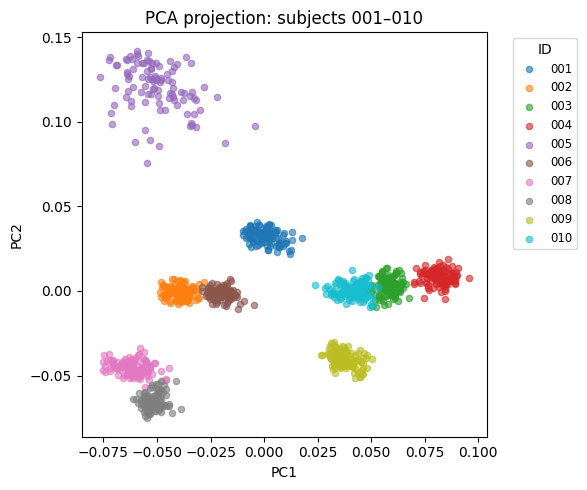

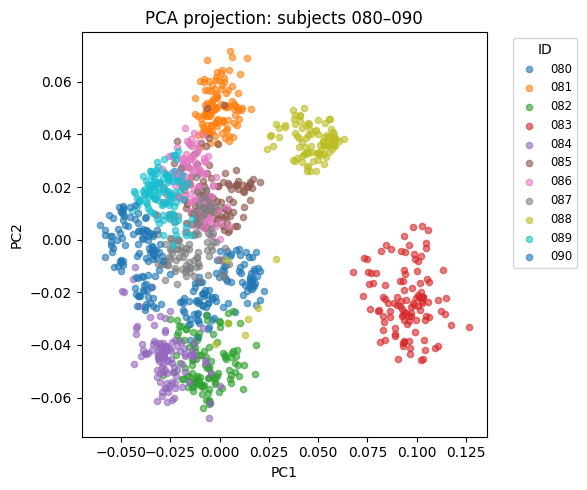

In [ ]:
import os
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1) Path tới gallery cache (đã tạo bằng --cache trước đó)
pretr = '/content/dataset/content/GaitSetv1/data_pretr'
cache_path = os.path.join(pretr, 'gallery_cache.npz')
if not os.path.isfile(cache_path):
    raise FileNotFoundError(f"Không thấy {cache_path}, vui lòng chạy inference với --cache trước.")

data = np.load(cache_path, allow_pickle=True)
gallery_feats  = data['feats']    # shape (N, D)
gallery_labels = data['labels']   # array of strings

def plot_id_range(start, end):
    # danh sách ID zero-padded
    ids = [f"{i:03d}" for i in range(start, end+1)]
    mask = np.isin(gallery_labels, ids)
    feats_sel  = gallery_feats[mask]
    labels_sel = gallery_labels[mask]

    # PCA xuống 2D
    pca = PCA(n_components=2)
    feats2d = pca.fit_transform(feats_sel)

    # Scatter
    plt.figure(figsize=(6,5))
    for uid in ids:
        m = labels_sel == uid
        plt.scatter(feats2d[m,0], feats2d[m,1],
                    label=uid, s=20, alpha=0.6)
    plt.title(f"PCA projection: subjects {ids[0]}–{ids[-1]}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="ID", bbox_to_anchor=(1.05,1),
               loc="upper left", fontsize="small")
    plt.tight_layout()
    plt.show()

# Plot 001–010
plot_id_range(1, 10)

# Plot 080–090
plot_id_range(80, 90)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1090 samples in 0.009s...
[t-SNE] Computed neighbors for 1090 samples in 2.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1090
[t-SNE] Computed conditional probabilities for sample 1090 / 1090
[t-SNE] Mean sigma: 0.020719
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.666580
[t-SNE] KL divergence after 1000 iterations: 0.197121


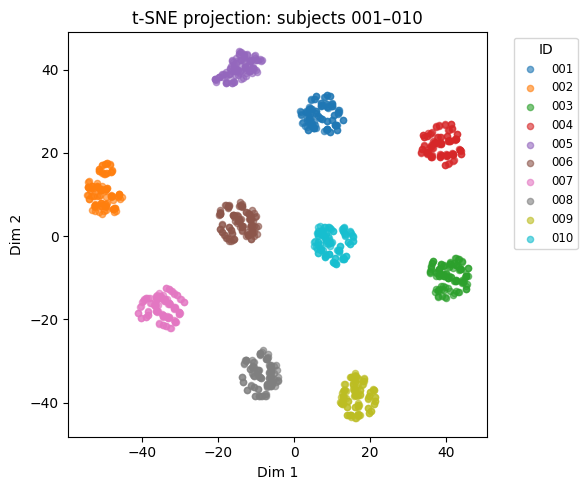

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1201 samples in 0.007s...
[t-SNE] Computed neighbors for 1201 samples in 1.682s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1201
[t-SNE] Computed conditional probabilities for sample 1201 / 1201
[t-SNE] Mean sigma: 0.028919
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.200062
[t-SNE] KL divergence after 1000 iterations: 0.178484


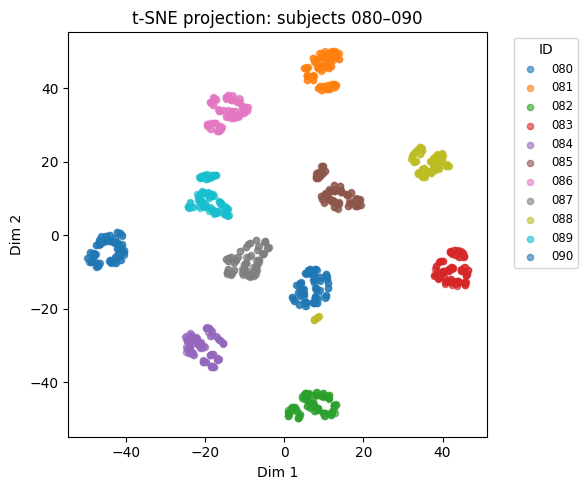

In [ ]:
import os
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1) Path tới gallery cache
pretr = '/content/dataset/content/GaitSetv1/data_pretr'
cache_path = os.path.join(pretr, 'gallery_cache.npz')
if not os.path.isfile(cache_path):
    raise FileNotFoundError(f"Không thấy {cache_path}, vui lòng chạy inference với --cache trước.")

data = np.load(cache_path, allow_pickle=True)
gallery_feats  = data['feats']    # shape (N, D)
gallery_labels = data['labels']   # array of strings

def plot_id_range_tsne(start, end, perplexity=30, max_iter=1000):
    # danh sách ID zero-padded
    ids = [f"{i:03d}" for i in range(start, end+1)]
    mask = np.isin(gallery_labels, ids)
    feats_sel  = gallery_feats[mask]
    labels_sel = gallery_labels[mask]

    # t-SNE xuống 2D
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        max_iter=max_iter,    # thay n_iter -> max_iter
        init='pca',
        random_state=42,
        verbose=1             # in tiến độ nếu thích
    )
    feats2d = tsne.fit_transform(feats_sel)

    # Scatter
    plt.figure(figsize=(6,5))
    for uid in ids:
        m = labels_sel == uid
        plt.scatter(feats2d[m,0], feats2d[m,1],
                    label=uid, s=20, alpha=0.6)
    plt.title(f"t-SNE projection: subjects {ids[0]}–{ids[-1]}")
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.legend(title="ID", bbox_to_anchor=(1.05,1),
               loc="upper left", fontsize="small")
    plt.tight_layout()
    plt.show()

# Ví dụ: 001–010
plot_id_range_tsne(1, 10, perplexity=40, max_iter=1000)

# Ví dụ: 080–090
plot_id_range_tsne(80, 90, perplexity=40, max_iter=1000)


In [ ]:
import numpy as np

# Cập nhật đường dẫn tới file cache gallery embeddings của bạn
cache_path = '/content/dataset/content/GaitSetv1/data_pretr/gallery_cache.npz'

# Load dữ liệu
data = np.load(cache_path, allow_pickle=True)
gallery_feats = data['feats']  # shape (N_sequences, D_features)

# In thông tin cơ bản về chiều dữ liệu
print("Shape of gallery_feats:", gallery_feats.shape)
print("Feature dimension (D):", gallery_feats.shape[1])

# Thống kê giá trị
print("Min value:", np.min(gallery_feats))
print("Max value:", np.max(gallery_feats))
print("Mean value:", np.mean(gallery_feats))
print("Std deviation:", np.std(gallery_feats))

# In 5 giá trị đầu của embedding vector đầu tiên
print("First 5 values of the first embedding vector:", gallery_feats[0, :5])


Shape of gallery_feats: (13592, 15872)
Feature dimension (D): 15872
Min value: -0.012458409
Max value: 0.012193917
Mean value: 5.664007e-06
Std deviation: 0.0017253169
First 5 values of the first embedding vector: [ 0.00057718  0.00237678  0.00042234 -0.00248554 -0.00308036]


Selected 540 embeddings for subjects ['001', '002', '003', '004', '005']
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 540 samples in 0.004s...
[t-SNE] Computed neighbors for 540 samples in 0.402s...
[t-SNE] Computed conditional probabilities for sample 540 / 540
[t-SNE] Mean sigma: 0.021778
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.406269
[t-SNE] KL divergence after 1000 iterations: 0.176419

First 5 high-dim embeddings (dim = 15872):
#0: [ 0.00057718  0.00237678  0.00042234 -0.00248554 -0.00308036] …
#1: [ 0.00100886  0.00187229  0.00023985 -0.00248164 -0.00341501] …
#2: [ 0.00094096  0.00212224  0.0004037  -0.00250272 -0.00341358] …
#3: [ 0.00096229  0.00198106  0.00048611 -0.00247165 -0.00319362] …
#4: [ 0.00090997  0.00183907  0.00044404 -0.00257117 -0.00365614] …

First 5 2D coords after t-SNE:
#0: [ 0.7119465 -4.5046935]
#1: [-1.4655584 -4.511151 ]
#2: [-2.3873055 -4.5252767]
#3: [-3.509767  -4.9525385]
#4: [-7.205573  -3.2464788]


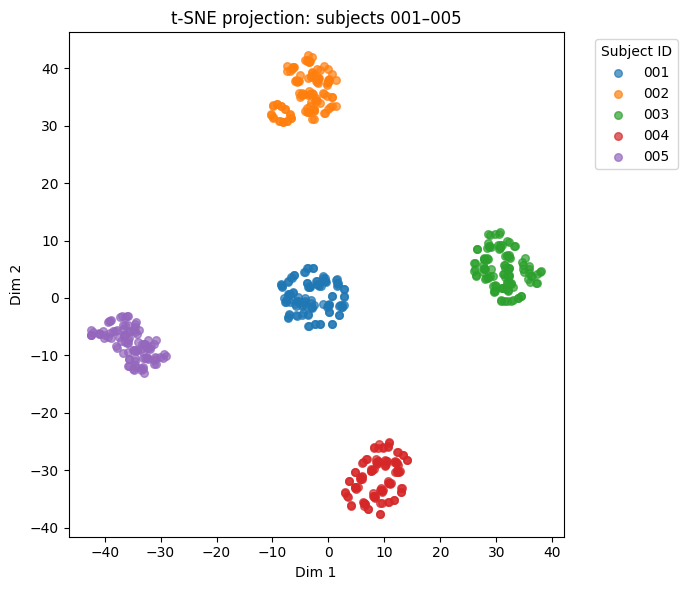

In [ ]:
import os
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1) Load gallery embeddings cache
pretr = '/content/dataset/content/GaitSetv1/data_pretr'
cache_path = os.path.join(pretr, 'gallery_cache.npz')
if not os.path.isfile(cache_path):
    raise FileNotFoundError(f"Không thấy file cache tại {cache_path}. Vui lòng chạy inference với --cache.")

data = np.load(cache_path, allow_pickle=True)
gallery_feats  = data['feats']    # shape (N_sequences, D_features)
gallery_labels = data['labels']   # 1D array of strings

# 2) Chọn tập con để thử (ví dụ subjects 001–005)
ids = [f"{i:03d}" for i in range(1, 6)]
mask = np.isin(gallery_labels, ids)
feats_sel  = gallery_feats[mask]
labels_sel = gallery_labels[mask]
print(f"Selected {feats_sel.shape[0]} embeddings for subjects {ids}")

# 3) Áp t-SNE xuống 2D
tsne = TSNE(
    n_components=2,
    perplexity=40,
    max_iter=1000,
    init='pca',
    random_state=42,
    verbose=1
)
feats2d = tsne.fit_transform(feats_sel)  # shape = (M, 2)

# 4) In ra 5 vector gốc và 5 tọa độ 2D đầu tiên
print("\nFirst 5 high-dim embeddings (dim = {}):".format(feats_sel.shape[1]))
for i in range(5):
    print(f"#{i}: {feats_sel[i, :5]} …")  # chỉ in 5 giá trị đầu

print("\nFirst 5 2D coords after t-SNE:")
for i in range(5):
    print(f"#{i}: {feats2d[i]}")

# 5) Vẽ scatter plot
plt.figure(figsize=(7,6))
for uid in ids:
    m = labels_sel == uid
    plt.scatter(feats2d[m,0], feats2d[m,1],
                label=uid, s=30, alpha=0.7)
plt.title("t-SNE projection: subjects {}–{}".format(ids[0], ids[-1]))
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title="Subject ID", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


#WEB3

In [ ]:
# FastAPI + Uvicorn + multipart
!pip install fastapi uvicorn python-multipart


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.3 MB/s eta 0:00:00


In [ ]:
%%bash
mkdir -p static
cat > static/index.html << 'EOF'
<!DOCTYPE html>
<html>
<head>
  <meta charset="utf-8">
  <title>Gait Recognition Demo</title>
</head>
<body>
  <h1>Gait Recognition Demo</h1>
  <form id="f" enctype="multipart/form-data" method="post" action="/predict">
    <input type="file" id="file" name="file" accept=".zip" required>
    <button type="submit">Predict</button>
  </form>
  <pre id="out"></pre>
  <script>
    const form = document.getElementById('f'),
          out  = document.getElementById('out');
    form.onsubmit = async e => {
      e.preventDefault();
      out.textContent = '⏳ Uploading & waiting…';
      const file = document.getElementById('file').files[0];
      const fd   = new FormData(); fd.append('file', file);
      try {
        const res  = await fetch('/predict', { method:'POST', body: fd });
        const text = await res.text();
        out.textContent = `HTTP ${res.status} ${res.statusText}\n\n${text}`;
        try {
          const j = JSON.parse(text);
          out.textContent += `\n\n↳ parsed JSON:\n` + JSON.stringify(j, null, 2);
        } catch {}
      } catch(err) {
        out.textContent = '❌ Error: ' + err.message;
      }
    };
  </script>
</body>
</html>
EOF


In [ ]:
%%bash
cat > app.py << 'EOF'
import os, zipfile, tempfile
from fastapi import FastAPI, File, UploadFile, HTTPException
from fastapi.responses import FileResponse
from fastapi.staticfiles import StaticFiles
from pydantic import BaseModel
from inference_api import init_model, predict_from_folder

app = FastAPI()

# mount tĩnh
app.mount("/static", StaticFiles(directory="static"), name="static")

# GET / → index.html
@app.get("/", include_in_schema=False)
async def index():
    return FileResponse("static/index.html")

# startup load model
@app.on_event("startup")
def startup():
    global MODEL
    MODEL = init_model(
        checkpoint_path="work/checkpoint/GaitSet/GaitSet_CASIA-B_70_False_256_0.2_128_full_30-50000-encoder.ptm",
        pretr_path="/content/dataset/content/GaitSetv1/data_pretr",
        use_faiss=True
    )

class Prediction(BaseModel):
    subject_id: str
    view: str

# POST /predict
@app.post("/predict", response_model=Prediction)
async def predict(file: UploadFile = File(...)):
    if not file.filename.lower().endswith(".zip"):
        raise HTTPException(400, "Chỉ upload file .zip silhouette")
    with tempfile.TemporaryDirectory() as tmp:
        fp = os.path.join(tmp, file.filename)
        with open(fp, "wb") as f:
            f.write(await file.read())
        with zipfile.ZipFile(fp, "r") as z:
            z.extractall(tmp)
        seq = next(os.path.join(tmp,d)
                   for d in os.listdir(tmp)
                   if os.path.isdir(os.path.join(tmp,d)))
        sid, view = predict_from_folder(MODEL, seq)
    return Prediction(subject_id=str(sid), view=str(view).zfill(3))

if __name__ == "__main__":
    import uvicorn
    uvicorn.run("app:app", host="0.0.0.0", port=8000)
EOF


In [ ]:
%cd /content/GaitSetv1/

/content/GaitSetv1


In [ ]:
import gradio as gr
import zipfile, tempfile, os, traceback
from model.utils.inference_api import init_model, predict_from_folder

# 1) Khởi model
MODEL = init_model(
    checkpoint_path="/content/GaitSetv1/work/checkpoint/GaitSet/GaitSet_CASIA-B_70_False_256_0.2_128_full_30-50000-encoder.ptm",
    pretr_path="/content/dataset/content/GaitSetv1/data_pretr",
    resolution=64
)



/content/GaitSetv1/model/utils/inference_api.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  
/usr/local/lib/python3.11/dist-packages/gradio/interface.py:415: UserWarnin

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://29010ecc59bf6c1d6c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr, traceback, tempfile, zipfile, os
from model.utils.inference_api import predict_from_folder

def demo_predict(zip_filepath):
    try:
        with tempfile.TemporaryDirectory() as tmp:
            with zipfile.ZipFile(zip_filepath, "r") as z:
                z.extractall(tmp)

            # DEBUG: in ra toàn bộ file/folder trong tmp
            structure = []
            for root, dirs, files in os.walk(tmp):
                for name in dirs + files:
                    structure.append(os.path.join(root, name))
            print("Cấu trúc thư mục sau khi giải nén:\n", "\n".join(structure))

            # xác định thư mục chứa ảnh
            subdirs = [
                os.path.join(tmp, d)
                for d in os.listdir(tmp)
                if os.path.isdir(os.path.join(tmp, d))
            ]
            if len(subdirs) == 1:
                seq_folder = subdirs[0]
            else:
                seq_folder = tmp

            # chạy dự đoán
            sid, view = predict_from_folder(MODEL, seq_folder)
            return str(sid), f"{view}°"
    except Exception:
        return "ERROR", traceback.format_exc()



iface = gr.Interface(
    fn=demo_predict,
    inputs=gr.File(label="Upload .zip silhouette", type="filepath"),
    outputs=[
        gr.Textbox(label="Predicted Subject"),
        gr.Textbox(label="Predicted View / Error trace")
    ],
    title="Gait Recognition Demo",
    description="Chọn file ZIP silhouette (1 thư mục con), nhấn Submit để xem kết quả",
    allow_flagging="never"
)

iface.launch(share=True)


/usr/local/lib/python3.11/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://17b7da934a212b039d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install -q huggingface_hub

from huggingface_hub import notebook_login
notebook_login()


#ENDWEB3

#WEB2_1302

In [ ]:
!pip install fastapi uvicorn python-multipart faiss-cpu nest-asyncio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.0 MB/s eta 0:00:00


In [ ]:
!mkdir static

In [ ]:
%%bash
cat > static/index.html << 'EOF'
<!DOCTYPE html>
<html>
<head>
  <meta charset="utf-8">
  <title>Gait Recognition Demo</title>
</head>
<body>
  <h1>Gait Recognition Demo</h1>
  <form id="f" enctype="multipart/form-data">
    <input type="file" id="file" name="file" accept=".zip" required>
    <button type="submit">Predict</button>
  </form>
  <pre id="out"></pre>
  <script>
    const f = document.getElementById('f');
    const out = document.getElementById('out');
    f.onsubmit = async e => {
      e.preventDefault();
      const file = document.getElementById('file').files[0];
      const fd = new FormData();
      fd.append('file', file);
      out.textContent = 'Loading…';
      try {
        const res = await fetch('/predict', { method:'POST', body: fd });
        const json = await res.json();
        out.textContent = `Subject: ${json.subject_id}\nView: ${json.view}°`;
      } catch (err) {
        out.textContent = 'Error: ' + err.message;
      }
    };
  </script>
</body>
</html>
EOF


In [ ]:
%%bash
cat > inference_api.py << 'EOF'
import os, numpy as np, torch, faiss
from model.network.gaitset import SetNet
from model.utils.data_set import DataSet

def init_model(checkpoint_path, pretr_path, use_faiss=False):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    raw = torch.load(checkpoint_path, map_location=device)
    hidden_dim = next(v.shape[2] for k,v in raw.items() if k.endswith("fc_bin.0"))
    enc = SetNet(hidden_dim).to(device)
    enc.load_state_dict({k[7:]:v for k,v in raw.items()})
    enc.eval()
    # load gallery cache
    data = np.load(os.path.join(pretr_path,'gallery_cache.npz'), allow_pickle=True)
    feats  = data['feats'].astype('float32')
    labels = data['labels'].tolist()
    views  = data['views'].tolist()
    index = None
    if use_faiss:
        idx = faiss.IndexFlatL2(feats.shape[1])
        idx.add(feats)
        index = idx
    return {"enc":enc,"dev":device,"feats":feats,"labels":labels,"views":views,"index":index}

def predict_from_folder(model, seq_folder):
    enc, device = model["enc"], model["dev"]
    subj = os.path.basename(os.path.dirname(os.path.dirname(seq_folder)))
    view = os.path.basename(seq_folder)
    ds = DataSet([[seq_folder]],[subj],["probe"],[view],cache=False,resolution=64)
    data,_,_,_,_ = ds[0]
    seq = data[0].values.astype('float32')/255.0
    t = torch.from_numpy(seq).unsqueeze(0).to(device)
    with torch.no_grad():
        feat,_ = enc(t,None)
    D = feat.numel()//feat.size(0)
    emb = feat.view(1,D).cpu().numpy().astype('float32')
    if model["index"] is not None:
        _, idx = model["index"].search(emb,1)
        i = int(idx[0][0])
    else:
        d = np.linalg.norm(model["feats"]-emb,axis=1)
        i = int(np.argmin(d))
    return model["labels"][i], model["views"][i]
EOF


In [ ]:
import nest_asyncio, uvicorn
nest_asyncio.apply()
get_ipython().system_raw("uvicorn app:app --host 0.0.0.0 --port 8000 &")


In [ ]:
%%bash --bg
uvicorn app:app --host 0.0.0.0 --port 8000


In [ ]:
!lt --port 8000


/bin/bash: line 1: lt: command not found


###Ngrok

In [ ]:
# Tải về ngrok binary (Linux AMD64)
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# Giải nén
!unzip -qq ngrok-stable-linux-amd64.zip


In [ ]:
!./ngrok authtoken 2hs3uau7YxlpOximPrHIeu1GuAU_4hpEnCYGBqRGyMqBEB42p

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
import nest_asyncio, uvicorn
nest_asyncio.apply()

# Chạy uvicorn ở background
get_ipython().system_raw("uvicorn app:app --host 0.0.0.0 --port 8000 &")


In [ ]:
# Chạy ngrok HTTP tunnel, sẽ in ra Forwarding URL
!./ngrok http 8000 --log=stdout


INFO[05-13|09:58:38] no configuration paths supplied 
INFO[05-13|09:58:38] using configuration at default config path path=/root/.ngrok2/ngrok.yml
INFO[05-13|09:58:38] open config file                         path=/root/.ngrok2/ngrok.yml err=nil
t=2025-05-13T09:58:38+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
t=2025-05-13T09:58:38+0000 lvl=eror msg="failed to auth" obj=tunnels.session err="Your ngrok-agent version \"2.3.41\" is too old. The minimum supported agent version for your account is \"3.7.0\". Please update to a newer version with `ngrok update`, by downloading from https://ngrok.com/download, or by updating your SDK version. Paid accounts are currently excluded from minimum agent version requirements. To begin handling traffic immediately without updating your agent, upgrade to a paid plan: https://dashboard.ngrok.com/billing/subscription.\r\n\r\nERR_NGROK_121\r\n"
t=2025-05-13T09:58:38+0000 lvl=eror msg="failed to reconnect session" obj=csess id=ef5

In [ ]:
# Xóa (nếu có) binary ngrok cũ
!rm -f ngrok ngrok-stable-linux-amd64.zip ngrok-v3-stable-linux-amd64.tgz

# Tải agent v3 cho Linux AMD64 (link chính thức của ngrok)
!wget -q https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz

# Giải nén, cho phép thực thi
!tar -xzf ngrok-v3-stable-linux-amd64.tgz
!chmod +x ngrok


In [ ]:
# Thay YOUR_REAL_AUTHTOKEN bằng token bạn copy từ "Your Authtoken" trên ngrok.com
!./ngrok authtoken 2hs3uau7YxlpOximPrHIeu1GuAU_4hpEnCYGBqRGyMqBEB42p


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
Default version saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
import nest_asyncio, uvicorn
nest_asyncio.apply()

# Start FastAPI in nền
get_ipython().system_raw("uvicorn app:app --host 0.0.0.0 --port 8000 &")


In [ ]:
# thử curl xem có phản hồi không
!curl -v http://127.0.0.1:8000


*   Trying 127.0.0.1:8000...
* connect to 127.0.0.1 port 8000 failed: Connection refused
* Failed to connect to 127.0.0.1 port 8000 after 0 ms: Connection refused
* Closing connection 0
curl: (7) Failed to connect to 127.0.0.1 port 8000 after 0 ms: Connection refused


In [ ]:
# Chạy ngrok (foreground) để in ra URL
!./ngrok http 8000 --log=stdout


INFO[05-13|10:00:27] no configuration paths supplied 
WARN[05-13|10:00:27] ngrok config file found at legacy location, move to XDG location xdg_path=/root/.config/ngrok/ngrok.yml legacy_path=/root/.ngrok2/ngrok.yml
INFO[05-13|10:00:27] using configuration at default config path path=/root/.ngrok2/ngrok.yml
INFO[05-13|10:00:27] open config file                         path=/root/.ngrok2/ngrok.yml err=nil
t=2025-05-13T10:00:28+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]
t=2025-05-13T10:00:28+0000 lvl=info msg="client session established" obj=tunnels.session
t=2025-05-13T10:00:28+0000 lvl=info msg="tunnel session started" obj=tunnels.session
t=2025-05-13T10:00:28+0000 lvl=info msg="started tunnel" obj=tunnels name=command_line addr=http://localhost:8000 url=https://88bf-34-139-203-18.ngrok-free.app
t=2025-05-13T10:01:16+0000 lvl=warn msg="failed to open private leg" id=f69b9b9221f2 privaddr=localhost:8000 err="dial tcp 127.0.0.1:8000: connect: conne

In [ ]:
import nest_asyncio, uvicorn
nest_asyncio.apply()

# Chạy uvicorn (app.py) trên port 8000
get_ipython().system_raw("uvicorn app:app --host 0.0.0.0 --port 8000 &")
print("▶️ uvicorn started")


▶️ uvicorn started


In [ ]:
# Đợi 2 giây để uvicorn nổ server
!sleep 2

# Gửi request HEAD để kiểm tra
!curl -I http://127.0.0.1:8000


curl: (7) Failed to connect to 127.0.0.1 port 8000 after 0 ms: Connection refused


In [ ]:
# Xem đường dẫn làm việc hiện tại
!pwd

# Liệt kê nội dung thư mục
!ls -l


/content/GaitSetv1
total 36352
-rw-r--r-- 1 root root      771 May 13 09:30 config.py
-rw-r--r-- 1 root root     1771 May 13 09:52 inference_api.py
-rw-r--r-- 1 root root     4694 May 13 09:52 inference.py
drwxr-xr-x 5 root root     4096 May 13 09:30 model
-rwxr-xr-x 1 root root 27762872 Apr 10 19:59 ngrok
-rw-r--r-- 1 root root  9395172 May 13 10:00 ngrok-v3-stable-linux-amd64.tgz
-rw-r--r-- 1 root root     1359 May 13 09:30 pretreatment.log
-rw-r--r-- 1 root root     5997 May 13 09:30 pretreatment.py
drwxr-xr-x 2 root root     4096 May 13 09:30 __pycache__
-rw-r--r-- 1 root root     6656 May 13 09:30 README.md
drwxr-xr-x 2 root root     4096 May 13 09:52 static
-rw-r--r-- 1 root root     2935 May 13 09:30 test.py
-rw-r--r-- 1 root root      699 May 13 09:30 train.py
drwxr-xr-x 5 root root     4096 May 13 09:30 work


In [ ]:
%cd /content/GaitSetv1/

/content/GaitSetv1


In [ ]:
!python inference.py \
  --pretr /content/dataset/content/GaitSetv1/data_pretr \
  --checkpoint work/checkpoint/GaitSet/GaitSet_CASIA-B_70_False_256_0.2_128_full_30-50000-encoder.ptm \
  --probe /content/dataset/content/GaitSetv1/data_pretr/001/bg-01/000 \
  --cache


Using device: cuda
Detected hidden_dim: 256
Loaded checkpoint: work/checkpoint/GaitSet/GaitSet_CASIA-B_70_False_256_0.2_128_full_30-50000-encoder.ptm
Loading gallery embeddings from cache: /content/dataset/content/GaitSetv1/data_pretr/gallery_cache.npz
Probe → subject: 001, view: 000
Probe : 100% 1/1 [00:00<00:00,  4.24it/s]
⇒ Predicted ID: 001 (confidence: 0.01%)
⇒ Predicted view: 0°


In [ ]:
%%bash
cat > app.py << 'EOF'
import os, zipfile, tempfile
from fastapi import FastAPI, File, UploadFile, HTTPException
from fastapi.staticfiles import StaticFiles
from pydantic import BaseModel
from inference_api import init_model, predict_from_folder

app = FastAPI()
# serve thư mục static/ làm trang chủ
app.mount("/", StaticFiles(directory="static", html=True), name="static")

# Load model + gallery khi khởi động
@app.on_event("startup")
def startup():
    global MODEL
    MODEL = init_model(
        checkpoint_path="work/checkpoint/GaitSet/GaitSet_CASIA-B_70_False_256_0.2_128_full_30-50000-encoder.ptm",
        pretr_path="data_pretr",
        use_faiss=True
    )

class Prediction(BaseModel):
    subject_id: str
    view: str

@app.post("/predict", response_model=Prediction)
async def predict(file: UploadFile = File(...)):
    # chỉ chấp nhận .zip
    if not file.filename.lower().endswith(".zip"):
        raise HTTPException(400, "Chỉ upload file .zip silhouette")
    with tempfile.TemporaryDirectory() as tmp:
        fp = os.path.join(tmp, file.filename)
        # lưu file
        with open(fp, "wb") as f:
            f.write(await file.read())
        # giải nén
        with zipfile.ZipFile(fp, "r") as z:
            z.extractall(tmp)
        # lấy folder đầu tiên làm probe
        seq = next(os.path.join(tmp,d) for d in os.listdir(tmp)
                   if os.path.isdir(os.path.join(tmp,d)))
        sid, view = predict_from_folder(MODEL, seq)
    return Prediction(subject_id=sid, view=view)

if __name__ == "__main__":
    import uvicorn
    uvicorn.run("app:app", host="0.0.0.0", port=8000)
EOF


In [ ]:
# từ thư mục /content/GaitSetv1
!ln -s /content/dataset/content/GaitSetv1/data_pretr data_pretr


In [ ]:
!uvicorn app:app --host 0.0.0.0 --port 8000


INFO:     Started server process [12915]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Finished server process [12915]
ERROR:    Traceback (most recent call last):
  File "/usr/lib/python3.11/asyncio/runners.py", line 190, in run
    return runner.run(main)
           ^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/runners.py", line 118, in run
    return self._loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/base_events.py", line 641, in run_until_complete
    self.run_forever()
  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
    self._run_once()
  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    self._context.run(self._callback, *self.

In [ ]:
import nest_asyncio, uvicorn
nest_asyncio.apply()

# Chạy uvicorn trong nền, không block cell
get_ipython().system_raw("uvicorn app:app --host 0.0.0.0 --port 8000 &")
print("▶️ Uvicorn đã khởi động ở port 8000")


▶️ Uvicorn đã khởi động ở port 8000


In [ ]:
# Đợi 1–2s cho server nổ, rồi test
!sleep 2
!curl -I http://127.0.0.1:8000


curl: (7) Failed to connect to 127.0.0.1 port 8000 after 0 ms: Connection refused


In [ ]:
import nest_asyncio
nest_asyncio.apply()

# 1) Dừng hết uvicorn cũ (nếu có)
!pkill -f "uvicorn app:app" || echo "No uvicorn to kill"

# 2) Khởi lại FastAPI background
get_ipython().system_raw("python -m uvicorn app:app --host 0.0.0.0 --port 8000 &")
print("▶️ FastAPI đang chạy nền…")


^C
▶️ FastAPI đang chạy nền…


In [ ]:
# Đợi server nổ
!sleep 3
# Test lại
!curl -I http://127.0.0.1:8000


curl: (7) Failed to connect to 127.0.0.1 port 8000 after 0 ms: Connection refused


In [ ]:
!./ngrok http 8000 --log=stdout


INFO[05-13|10:31:40] no configuration paths supplied 
WARN[05-13|10:31:40] ngrok config file found at legacy location, move to XDG location xdg_path=/root/.config/ngrok/ngrok.yml legacy_path=/root/.ngrok2/ngrok.yml
INFO[05-13|10:31:40] using configuration at default config path path=/root/.ngrok2/ngrok.yml
INFO[05-13|10:31:40] open config file                         path=/root/.ngrok2/ngrok.yml err=nil
t=2025-05-13T10:31:40+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]
t=2025-05-13T10:31:41+0000 lvl=info msg="client session established" obj=tunnels.session
t=2025-05-13T10:31:41+0000 lvl=info msg="tunnel session started" obj=tunnels.session
t=2025-05-13T10:31:41+0000 lvl=info msg="started tunnel" obj=tunnels name=command_line addr=http://localhost:8000 url=https://294d-34-139-203-18.ngrok-free.app
t=2025-05-13T10:31:46+0000 lvl=info msg="join connections" obj=join id=5b9f9ad8752d l=127.0.0.1:8000 r=113.22.226.0:62546
t=2025-05-13T10:33:17+0000 lvl=

In [ ]:
%%bash
cd /content/dataset/content/GaitSetv1/data_pretr/001/bg-01
zip -r test_probe_001_bg01_000.zip 000
mv test_probe_001_bg01_000.zip /content/GaitSetv1


  adding: 000/ (stored 0%)
  adding: 000/001-bg-01-000-009.png (stored 0%)
  adding: 000/001-bg-01-000-081.png (stored 0%)
  adding: 000/001-bg-01-000-088.png (stored 0%)
  adding: 000/001-bg-01-000-001.png (stored 0%)
  adding: 000/001-bg-01-000-042.png (stored 0%)
  adding: 000/001-bg-01-000-022.png (stored 0%)
  adding: 000/001-bg-01-000-068.png (stored 0%)
  adding: 000/001-bg-01-000-040.png (stored 0%)
  adding: 000/001-bg-01-000-087.png (stored 0%)
  adding: 000/001-bg-01-000-017.png (stored 0%)
  adding: 000/001-bg-01-000-053.png (stored 0%)
  adding: 000/001-bg-01-000-076.png (stored 0%)
  adding: 000/001-bg-01-000-054.png (stored 0%)
  adding: 000/001-bg-01-000-066.png (stored 0%)
  adding: 000/001-bg-01-000-082.png (stored 0%)
  adding: 000/001-bg-01-000-026.png (stored 0%)
  adding: 000/001-bg-01-000-006.png (stored 0%)
  adding: 000/001-bg-01-000-084.png (stored 0%)
  adding: 000/001-bg-01-000-079.png (stored 0%)
  adding: 000/001-bg-01-000-057.png (stored 0%)
  adding: 000

In [ ]:
import nest_asyncio
nest_asyncio.apply()

# kill mọi uvicorn cũ nếu có
!pkill -f "uvicorn app:app" || true

# start uvicorn, redirect stdout/stderr vào uvicorn.log
get_ipython().system_raw("uvicorn app:app --host 0.0.0.0 --port 8000 > uvicorn.log 2>&1 &")
print("▶️ uvicorn đang chạy nền, log tại uvicorn.log")


^C
▶️ uvicorn đang chạy nền, log tại uvicorn.log


In [ ]:
# Đợi thêm 2s cho chắc chặn log ghi xong
!sleep 2

# Xem 20 dòng đầu của uvicorn.log
!head -n 20 uvicorn.log


INFO:     Started server process [22014]
INFO:     Waiting for application startup.
ERROR:    Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/starlette/routing.py", line 692, in lifespan
    async with self.lifespan_context(app) as maybe_state:
  File "/usr/local/lib/python3.11/dist-packages/starlette/routing.py", line 569, in __aenter__
    await self._router.startup()
  File "/usr/local/lib/python3.11/dist-packages/starlette/routing.py", line 671, in startup
    handler()
  File "/content/GaitSetv1/app.py", line 22, in startup
    MODEL = init_model(
            ^^^^^^^^^^^
TypeError: init_model() got an unexpected keyword argument 'use_faiss'

ERROR:    Application startup failed. Exiting.


In [ ]:
# Gửi HEAD request để kiểm tra FastAPI có đang lắng nghe không
!curl -I http://127.0.0.1:8000


HTTP/1.1 200 OK
date: Tue, 13 May 2025 10:35:54 GMT
server: uvicorn
content-type: text/html; charset=utf-8
accept-ranges: bytes
content-length: 975
last-modified: Tue, 13 May 2025 09:52:41 GMT
etag: "3d1789743ae96ef7402f300f10c585c7"



In [ ]:
# Mở ngrok tunnel
!./ngrok http 8000 --log=stdout


INFO[05-13|10:38:34] no configuration paths supplied 
WARN[05-13|10:38:34] ngrok config file found at legacy location, move to XDG location xdg_path=/root/.config/ngrok/ngrok.yml legacy_path=/root/.ngrok2/ngrok.yml
INFO[05-13|10:38:34] using configuration at default config path path=/root/.ngrok2/ngrok.yml
INFO[05-13|10:38:34] open config file                         path=/root/.ngrok2/ngrok.yml err=nil
t=2025-05-13T10:38:34+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]
t=2025-05-13T10:38:34+0000 lvl=info msg="client session established" obj=tunnels.session
t=2025-05-13T10:38:34+0000 lvl=info msg="tunnel session started" obj=tunnels.session
t=2025-05-13T10:38:34+0000 lvl=info msg="started tunnel" obj=tunnels name=command_line addr=http://localhost:8000 url=https://39d6-34-139-203-18.ngrok-free.app
t=2025-05-13T10:38:38+0000 lvl=info msg="join connections" obj=join id=81ab6abc3d15 l=127.0.0.1:8000 r=1.53.98.85:62599
t=2025-05-13T10:41:20+0000 lvl=in

In [ ]:
%%bash
cat > static/index.html << 'EOF'
<!DOCTYPE html>
<html>
<head>
  <meta charset="utf-8">
  <title>Gait Recognition Demo</title>
</head>
<body>
  <h1>Gait Recognition Demo</h1>
  <form id="f" enctype="multipart/form-data">
    <input type="file" id="file" name="file" accept=".zip" required>
    <button type="submit">Predict</button>
  </form>
  <pre id="out"></pre>
  <script>
    const f   = document.getElementById('f'),
          out = document.getElementById('out');

    f.onsubmit = async e => {
      e.preventDefault();
      out.textContent = '⏳ Uploading & waiting…';
      const file = document.getElementById('file').files[0];
      const fd   = new FormData();
      fd.append('file', file);

      let res, json;
      try {
        res  = await fetch('/predict', { method:'POST', body: fd });
        const text = await res.text();
        // show raw status + body
        out.textContent =
          `HTTP ${res.status} ${res.statusText}\n\n` +
          text;
        // try parse JSON?
        try {
          json = JSON.parse(text);
          out.textContent += `\n\n↳ parsed JSON:\n` + JSON.stringify(json, null, 2);
        } catch(err) {
          console.warn("Not JSON:", err);
        }
      } catch(err) {
        out.textContent = '❌ Error: ' + err.message;
      }
    };
  </script>
</body>
</html>
EOF

In [ ]:
# kill mọi uvicorn còn đang chạy
!pkill -f "uvicorn app:app" || true


^C


In [ ]:
%%bash
cat > app.py << 'EOF'
import os, zipfile, tempfile
from fastapi import FastAPI, File, UploadFile, HTTPException
from fastapi.responses import FileResponse
from fastapi.staticfiles import StaticFiles
from pydantic import BaseModel

from inference_api import init_model, predict_from_folder

app = FastAPI()

# 1) Mount thư mục static tại /static
app.mount("/static", StaticFiles(directory="static"), name="static")

# 2) GET / trả về index.html
@app.get("/", include_in_schema=False)
async def index():
    return FileResponse("static/index.html")

# 3) Load model khi startup
@app.on_event("startup")
def startup():
    global MODEL
    MODEL = init_model(
        checkpoint_path="work/checkpoint/GaitSet/GaitSet_CASIA-B_70_False_256_0.2_128_full_30-50000-encoder.ptm",
        pretr_path="/content/dataset/content/GaitSetv1/data_pretr",
        use_faiss=True
    )

class Prediction(BaseModel):
    subject_id: str
    view: str

# 4) POST /predict trả về JSON prediction
@app.post("/predict", response_model=Prediction)
async def predict(file: UploadFile = File(...)):
    if not file.filename.lower().endswith(".zip"):
        raise HTTPException(400, "Chỉ upload file .zip silhouette")
    with tempfile.TemporaryDirectory() as tmp:
        fp = os.path.join(tmp, file.filename)
        with open(fp, "wb") as f:
            f.write(await file.read())
        with zipfile.ZipFile(fp, "r") as z:
            z.extractall(tmp)
        seq = next(os.path.join(tmp,d)
                   for d in os.listdir(tmp)
                   if os.path.isdir(os.path.join(tmp,d)))
        sid, view = predict_from_folder(MODEL, seq)
    return Prediction(subject_id=sid, view=view)

if __name__ == "__main__":
    import uvicorn
    uvicorn.run("app:app", host="0.0.0.0", port=8000)
EOF


In [ ]:
import nest_asyncio
nest_asyncio.apply()

# kill mọi uvicorn cũ, nếu có
!pkill -f "uvicorn app:app" || true

# start FastAPI ngầm (background)
get_ipython().system_raw("uvicorn app:app --host 0.0.0.0 --port 8000 &")
print("▶️ FastAPI đã chạy nền trên port 8000")


^C
▶️ FastAPI đã chạy nền trên port 8000


In [ ]:
# chờ 2s để server nổ
!sleep 2

# HEAD request tới /
!curl -I http://127.0.0.1:8000

# HEAD request tới /predict
!curl -I http://127.0.0.1:8000/predict


HTTP/1.1 405 Method Not Allowed
date: Tue, 13 May 2025 10:43:52 GMT
server: uvicorn
allow: GET
content-length: 31
content-type: application/json

HTTP/1.1 405 Method Not Allowed
date: Tue, 13 May 2025 10:43:52 GMT
server: uvicorn
allow: POST
content-length: 31
content-type: application/json



In [ ]:
!curl -v http://127.0.0.1:8000


*   Trying 127.0.0.1:8000...
* Connected to 127.0.0.1 (127.0.0.1) port 8000 (#0)
> GET / HTTP/1.1
> Host: 127.0.0.1:8000
> User-Agent: curl/7.81.0
> Accept: */*
> 
* Mark bundle as not supporting multiuse
< HTTP/1.1 200 OK
< date: Tue, 13 May 2025 10:44:44 GMT
< server: uvicorn
< content-type: text/html; charset=utf-8
< accept-ranges: bytes
< content-length: 1307
< last-modified: Tue, 13 May 2025 10:38:06 GMT
< etag: "31569b49ed63597dd6928a72d102856c"
< 
<!DOCTYPE html>
<html>
<head>
  <meta charset="utf-8">
  <title>Gait Recognition Demo</title>
</head>
<body>
  <h1>Gait Recognition Demo</h1>
  <form id="f" enctype="multipart/form-data">
    <input type="file" id="file" name="file" accept=".zip" required>
    <button type="submit">Predict</button>
  </form>
  <pre id="out"></pre>
  <script>
    const f   = document.getElementById('f'),
          out = document.getElementById('out');

    f.onsubmit = async e => {
      e.preventDefault();
      out.textContent = '⏳ Uploading & waiting

In [ ]:
!curl -v -F "file=@/content/GaitSetv1/test_probe_001_bg01_000.zip" \
       http://127.0.0.1:8000/predict


*   Trying 127.0.0.1:8000...
* Connected to 127.0.0.1 (127.0.0.1) port 8000 (#0)
> POST /predict HTTP/1.1
> Host: 127.0.0.1:8000
> User-Agent: curl/7.81.0
> Accept: */*
> Content-Length: 58300
> Content-Type: multipart/form-data; boundary=------------------------71a0793146cabcec
> 
* We are completely uploaded and fine
* Mark bundle as not supporting multiuse
< HTTP/1.1 500 Internal Server Error
< date: Tue, 13 May 2025 10:45:25 GMT
< server: uvicorn
< content-length: 21
< content-type: text/plain; charset=utf-8
< 
* Connection #0 to host 127.0.0.1 left intact
Internal Server Error

In [ ]:
!uvicorn app:app --host 0.0.0.0 --port 8000


INFO:     Started server process [20212]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 98] error while attempting to bind on address ('0.0.0.0', 8000): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


In [ ]:
!curl -v -F "file=@/content/GaitSetv1/test_probe_001_bg01_000.zip" \
       http://127.0.0.1:8000/predict


*   Trying 127.0.0.1:8000...
* Connected to 127.0.0.1 (127.0.0.1) port 8000 (#0)
> POST /predict HTTP/1.1
> Host: 127.0.0.1:8000
> User-Agent: curl/7.81.0
> Accept: */*
> Content-Length: 58300
> Content-Type: multipart/form-data; boundary=------------------------2b221afeafa1fecc
> 
* We are completely uploaded and fine
* Mark bundle as not supporting multiuse
< HTTP/1.1 500 Internal Server Error
< date: Tue, 13 May 2025 10:46:49 GMT
< server: uvicorn
< content-length: 21
< content-type: text/plain; charset=utf-8
< 
* Connection #0 to host 127.0.0.1 left intact
Internal Server Error

In [ ]:
!pkill -f "uvicorn app:app" || true


^C


In [ ]:
%%bash
# Thay return Prediction(subject_id=sid, view=view)
# thành return Prediction(subject_id=str(sid), view=str(view))
sed -i 's/return Prediction(subject_id=sid, view=view)/return Prediction(subject_id=str(sid), view=str(view))/g' app.py
echo "✅ Đã patch app.py xong!"


✅ Đã patch app.py xong!


In [ ]:
import nest_asyncio
nest_asyncio.apply()

# kill uvicorn cũ (nếu có)
!pkill -f "uvicorn app:app" || true

# start uvicorn + load model 1 lần (background)
get_ipython().system_raw("uvicorn app:app --host 0.0.0.0 --port 8000 &")
print("▶️ FastAPI + model đã khởi động nền trên port 8000")


^C
▶️ FastAPI + model đã khởi động nền trên port 8000


In [ ]:
%%bash
# Gửi POST test ngay lập tức, server đã sẵn sàng!
curl -v -F "file=@/content/GaitSetv1/test_probe_001_bg01_000.zip" \
     http://127.0.0.1:8000/predict


{"subject_id":"001","view":"0"}

*   Trying 127.0.0.1:8000...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0* Connected to 127.0.0.1 (127.0.0.1) port 8000 (#0)
> POST /predict HTTP/1.1
> Host: 127.0.0.1:8000
> User-Agent: curl/7.81.0
> Accept: */*
> Content-Length: 58300
> Content-Type: multipart/form-data; boundary=------------------------11f23b8e630a7a6e
> 
} [58300 bytes data]
* We are completely uploaded and fine
100 58300    0     0  100 58300      0  48483  0:00:01  0:00:01 --:--:-- 48583* Mark bundle as not supporting multiuse
< HTTP/1.1 200 OK
< date: Tue, 13 May 2025 11:04:13 GMT
< server: uvicorn
< content-length: 31
< content-type: application/json
< 
{ [31 bytes data]
100 58331  100    31  100 58300     14  26663  0:00:02  0:00:02 --:--:-- 26708
* Connection #0 to host 127.0.0.1 left intact


In [ ]:
%%bash
# patch app.py
sed -i '/return Prediction/{
s/return Prediction(subject_id=str(sid), view=str(view))/return Prediction(subject_id=str(sid), view=str(view).zfill(3))/
}' app.py

echo "✅ Đã zero-pad view trong app.py"


✅ Đã zero-pad view trong app.py


In [ ]:
!pkill -f "uvicorn app:app" || true


^C


In [ ]:
!python -m uvicorn app:app --host 0.0.0.0 --port 8000 &


INFO:     Started server process [25037]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [25037]


In [ ]:
# In 50 dòng cuối log để thấy lỗi
!tail -n 50 uvicorn.log


    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/fastapi/applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.11/dist-packages/starlette/applications.py", line 112, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.11/dist-packages/starlette/middleware/errors.py", line 187, in __call__
    raise exc
  File "/usr/local/lib/python3.11/dist-packages/starlette/middleware/errors.py", line 165, in __call__
    await self.app(scope, receive, _send)
  File "/usr/local/lib/python3.11/dist-packages/starlette/middleware/exceptions.py", line 62, in __call__
    await w

#END_WEB

In [ ]:
!python train.py

In [ ]:
%cd /content/GaitSetv1

/content/GaitSetv1


In [ ]:
!ls

config.py  model	     pretreatment.py  README.md  train.py
GaitSetv1  pretreatment.log  __pycache__      test.py	 work


In [ ]:
!python test.py

Initialzing...
Initializing data source...
Data initialization complete.
Initializing model...
Model initialization complete.
Loading the model of iteration 50000...
Transforming...
Evaluating...
Evaluation complete. Cost: 0:01:55.225455
===Rank-1 (Include identical-view cases)===
NM: 94.886,	BG: 88.618,	CL: 68.354
===Rank-1 (Exclude identical-view cases)===
NM: 94.375,	BG: 87.609,	CL: 66.570
===Rank-1 of each angle (Exclude identical-view cases)===
NM: [91.04 96.60 99.06 97.26 92.83 91.51 94.34 97.26 97.55 96.60 84.06]
BG: [84.53 90.47 93.02 89.43 84.15 80.47 84.62 91.32 93.11 91.62 80.94]
CL: [64.53 72.64 77.17 71.23 63.59 61.70 64.91 69.53 71.13 65.47 50.38]


In [ ]:
!pip install numpy==1.23.5 pandas==1.5.3 --force-reinstall


  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: six
    Found existing installation: si

In [ ]:
!ls checkpoint/GaitSet


ls: cannot access 'checkpoint/GaitSet': No such file or directory


#METRIC

In [ ]:
# Load model
import sys
import os
from model.initialization import initialization
from config import conf

conf['WORK_PATH'] = './work'
os.makedirs(conf['WORK_PATH'], exist_ok=True)

model_wrapper = initialization(conf, test=False)[0]  # hoặc test=False

model_wrapper.load(50000)
print("[OK] Model đã load xong checkpoint")


Initialzing...
Initializing data source...
Data initialization complete.
Initializing model...
Model initialization complete.
[OK] Model đã load xong checkpoint


In [ ]:
# Cell 2: Load ảnh silhouette với device chuẩn
import numpy as np
from PIL import Image
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_silhouette(path):
    img = Image.open(path).convert('L')  # ảnh grayscale
    arr = np.array(img).astype(np.float32) / 255.0
    arr = (arr - 0.5) / 0.5
    arr = np.expand_dims(arr, axis=0)                  # (1, H, W)
    tensor = torch.from_numpy(arr).unsqueeze(0).to(device)  # (1, 1, H, W)
    return tensor


In [ ]:
# Cell 3: Trích đặc trưng trung bình cho 1 sequence-view (nhiều ảnh)
import glob

def extract_sequence_feature(seq_view_dir):
    img_files = sorted(glob.glob(os.path.join(seq_view_dir, '*.png')))
    feats = []
    for path in img_files:
        x = load_silhouette(path)
        with torch.no_grad():
            f = model_wrapper.encoder(x)[0]
        feats.append(f.cpu().numpy().reshape(-1))
    return np.mean(feats, axis=0)  # feature trung bình (D,)


In [ ]:
print("model_wrapper contains:")
print(dir(model_wrapper))


model_wrapper contains:
['M', 'P', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'batch_size', 'collate_fn', 'dist_list', 'encoder', 'fit', 'frame_num', 'full_loss_metric', 'full_loss_num', 'hard_loss_metric', 'hard_or_full_trip', 'hidden_dim', 'img_size', 'load', 'lr', 'margin', 'mean_dist', 'model_name', 'np2var', 'num_workers', 'optimizer', 'restore_iter', 'sample_type', 'save', 'save_name', 'test_source', 'total_iter', 'train_pid_num', 'train_source', 'transform', 'triplet_loss', 'ts2var']


In [ ]:
from collections import defaultdict

subject_ids = list(range(72, 77))
root_dir = '/content/dataset/content/GaitSetv1/data_pretr'

gallery_seqs = ('nm-01', 'nm-02', 'nm-03', 'nm-04')
probe_seqs   = ('nm-05', 'nm-06', 'bg-01', 'bg-02', 'cl-01', 'cl-02')

gallery_features_by_view = defaultdict(list)
gallery_labels_by_view   = defaultdict(list)
gallery_seqs_by_view     = defaultdict(list)  # ✅ NEW

probe_features_by_view = defaultdict(list)
probe_labels_by_view   = defaultdict(list)
probe_seqs_by_view     = defaultdict(list)    # ✅ NEW

for sid in subject_ids:
    subj_dir = os.path.join(root_dir, f'{sid:03d}')
    if not os.path.isdir(subj_dir):
        continue

    for seq in gallery_seqs + probe_seqs:
        seq_path = os.path.join(subj_dir, seq)
        if not os.path.isdir(seq_path):
            continue

        for view in sorted(os.listdir(seq_path), key=int):
            view_path = os.path.join(seq_path, view)
            if not os.path.isdir(view_path):
                continue

            feat = extract_sequence_feature(view_path)
            view_int = int(view)

            if seq in gallery_seqs:
                gallery_features_by_view[view_int].append(feat)
                gallery_labels_by_view[view_int].append(sid)
                gallery_seqs_by_view[view_int].append(seq)  # ✅ Thêm tên sequence
            else:
                probe_features_by_view[view_int].append(feat)
                probe_labels_by_view[view_int].append(sid)
                probe_seqs_by_view[view_int].append(seq)    # ✅ Thêm tên sequence

            print(f"✓ Loaded: ID={sid}, {seq}@{view}, feat_dim={feat.shape[0]}")


KeyboardInterrupt: 

In [ ]:
import pandas as pd

def generate_distance_matrix_with_id_seq(
    gallery_feats_by_view, gallery_labels_by_view, gallery_seqs_by_view,
    probe_feats_by_view, probe_labels_by_view, probe_seqs_by_view,
    sid, distance_metric='euclidean'):

    views = list(range(0, 181, 18))
    result_matrix = np.empty((11, 11), dtype=object)

    for i, g_view in enumerate(views):
        g_feats = [f for f, l in zip(gallery_feats_by_view.get(g_view, []), gallery_labels_by_view.get(g_view, [])) if l == sid]
        if not g_feats:
            for j in range(11):
                result_matrix[j, i] = "N/A"
            continue

        gallery_vector = np.mean(np.vstack(g_feats), axis=0, keepdims=True)

        for j, p_view in enumerate(views):
            p_feats_all = probe_feats_by_view.get(p_view, [])
            p_labels_all = probe_labels_by_view.get(p_view, [])
            p_seqs_all = probe_seqs_by_view.get(p_view, [])

            if not p_feats_all:
                result_matrix[j, i] = "N/A"
                continue

            p_feats = np.vstack(p_feats_all)
            p_labels = np.array(p_labels_all)
            p_seqs = np.array(p_seqs_all)

            if distance_metric == 'euclidean':
                diff = p_feats - gallery_vector
                dists = np.linalg.norm(diff, axis=1)
            else:
                np_p = p_feats / np.linalg.norm(p_feats, axis=1, keepdims=True)
                np_g = gallery_vector / np.linalg.norm(gallery_vector)
                dists = 1.0 - np_p @ np_g.T

            min_idx = np.argmin(dists)
            min_dist = float(dists[min_idx])
            matched_id = p_labels[min_idx]
            matched_seq = p_seqs[min_idx]

            result_matrix[j, i] = f"{min_dist:.4f}[p{matched_id}/{matched_seq}]"

    return pd.DataFrame(result_matrix, index=[f"P@{v}" for v in views], columns=[f"G@{v}" for v in views])


In [ ]:
import numpy as np

def compute_accuracy_from_matrix(df, true_id):
    correct_by_probe_view = {}
    total_by_probe_view = {}

    total_correct_id = 0
    total_cells = 0

    for i, row_idx in enumerate(df.index):
        correct = 0
        total = 0
        for j, col in enumerate(df.columns):
            val = df.iloc[i, j]
            if isinstance(val, str) and val != "N/A":
                try:
                    id_info = val.split("[")[1].split("/")[0]  # p82 from p82/nm-06]
                    predicted_id = int(id_info.replace("p", ""))
                    if predicted_id == true_id:
                        correct += 1
                        total_correct_id += 1
                    total += 1
                    total_cells += 1
                except:
                    pass
        correct_by_probe_view[row_idx] = correct
        total_by_probe_view[row_idx] = total

    # Tính accuracy theo từng góc probe
    acc_by_view = {view: (correct_by_probe_view[view] / total_by_probe_view[view] * 100
                          if total_by_probe_view[view] > 0 else np.nan)
                   for view in correct_by_probe_view}

    # Accuracy toàn ID
    acc_id = total_correct_id / total_cells * 100 if total_cells > 0 else np.nan

    return acc_by_view, acc_id


In [ ]:
from IPython.display import display

for sid in range(72, 77):
    # Tạo bảng khoảng cách min (11x11)
    df = generate_distance_matrix_with_id_seq(
        gallery_features_by_view, gallery_labels_by_view, gallery_seqs_by_view,
        probe_features_by_view, probe_labels_by_view, probe_seqs_by_view,
        sid=sid
    )

    # Tính accuracy
    acc_by_view, acc_id = compute_accuracy_from_matrix(df, true_id=sid)

    # 📊 Hiển thị bảng
    print(f"\n📋 Distance Matrix for ID {sid}")
    display(df)

    # 📈 In độ chính xác
    print(f"🎯 Accuracy for ID {sid}: {acc_id:.2f}%")
    print("↳ Accuracy by Probe View:")
    for view, acc in acc_by_view.items():
        print(f"  {view}: {acc:.2f}%")



📋 Distance Matrix for ID 72


,G@0,G@18,G@36,G@54,G@72,G@90,G@108,G@126,G@144,G@162,G@180
P@0,3.2307[p72/nm-05],8.9632[p72/nm-06],12.2774[p72/nm-06],18.0275[p72/nm-06],23.1108[p76/nm-05],25.7834[p76/nm-05],24.6029[p76/nm-05],20.7835[p72/nm-06],16.6074[p72/nm-06],10.9461[p72/nm-06],8.5356[p72/nm-06]
P@18,8.8711[p72/nm-05],3.0026[p72/nm-05],8.0458[p72/nm-06],15.1609[p72/nm-06],20.5066[p76/nm-06],23.7464[p76/nm-06],22.4124[p76/nm-06],18.8142[p76/nm-06],14.9496[p72/nm-06],9.0576[p72/nm-06],11.6656[p72/nm-05]
P@36,12.2220[p72/cl-01],7.9633[p72/cl-01],3.4868[p72/nm-05],8.7905[p72/nm-06],15.9652[p76/nm-06],19.4574[p76/nm-06],17.9840[p76/nm-06],14.0197[p76/bg-01],10.8709[p72/nm-05],9.7399[p72/nm-05],13.9881[p72/cl-01]
P@54,16.3181[p72/cl-02],13.1963[p72/cl-02],9.3164[p72/nm-05],2.8535[p72/nm-05],10.4391[p72/nm-06],14.3390[p76/nm-06],13.6014[p76/nm-06],9.7521[p72/nm-05],10.0515[p72/nm-05],14.4633[p72/cl-02],18.1378[p76/cl-01]
P@72,19.6748[p72/cl-02],17.3444[p72/cl-02],12.7323[p72/cl-01],10.5935[p72/cl-01],2.9415[p72/nm-05],7.2713[p72/nm-05],7.6851[p72/nm-05],10.2839[p72/nm-05],12.8908[p72/cl-01],17.2637[p72/cl-01],21.5817[p72/cl-02]
P@90,21.6296[p74/cl-02],19.9653[p74/cl-02],16.0046[p72/cl-02],12.9557[p72/cl-02],7.7690[p72/nm-05],2.5621[p72/nm-05],5.5002[p72/nm-05],11.9082[p72/cl-01],13.7860[p72/cl-01],19.5155[p72/cl-02],22.1219[p76/cl-01]
P@108,20.4452[p72/cl-02],18.3975[p72/cl-02],14.0433[p72/cl-02],12.3109[p72/cl-02],7.7715[p72/nm-05],7.0955[p72/nm-05],3.6513[p72/nm-05],8.1683[p72/nm-05],12.0954[p72/cl-01],17.2305[p72/cl-02],21.0999[p74/cl-02]
P@126,17.3624[p72/cl-02],15.0470[p72/cl-02],11.3547[p72/cl-02],9.0410[p72/nm-05],10.8513[p72/nm-05],14.4101[p72/nm-05],10.8475[p72/nm-05],3.0503[p72/nm-05],6.9217[p72/nm-05],14.0019[p72/cl-02],18.6195[p72/cl-02]
P@144,15.3101[p72/cl-02],13.0016[p72/cl-02],9.8752[p72/nm-05],9.9410[p72/nm-05],15.5648[p72/nm-06],19.0642[p76/nm-05],16.9096[p76/nm-05],9.6187[p72/nm-05],2.9938[p72/nm-05],10.5972[p72/nm-05],16.3486[p72/cl-01]
P@162,11.1754[p72/nm-06],8.5006[p72/nm-06],9.5882[p72/nm-06],15.3438[p72/nm-06],21.1144[p72/nm-06],24.1069[p76/nm-05],22.4808[p76/nm-05],17.5186[p72/nm-06],11.9563[p72/nm-05],2.9951[p72/nm-05],10.3030[p72/nm-05]


🎯 Accuracy for ID 72: 79.34%
↳ Accuracy by Probe View:
  P@0: 72.73%
  P@18: 63.64%
  P@36: 63.64%
  P@54: 72.73%
  P@72: 100.00%
  P@90: 72.73%
  P@108: 90.91%
  P@126: 100.00%
  P@144: 81.82%
  P@162: 81.82%
  P@180: 72.73%

📋 Distance Matrix for ID 73


,G@0,G@18,G@36,G@54,G@72,G@90,G@108,G@126,G@144,G@162,G@180
P@0,4.4151[p73/nm-05],9.5196[p73/nm-06],12.2359[p73/bg-02],18.2022[p73/bg-02],21.3833[p76/nm-06],23.3597[p76/nm-05],21.3915[p76/nm-05],17.9274[p76/nm-06],13.6541[p76/nm-06],12.5137[p73/nm-06],11.2553[p73/bg-01]
P@18,7.6015[p73/nm-05],4.4817[p73/nm-06],8.3570[p73/nm-06],14.7730[p76/nm-05],19.0242[p76/nm-06],21.7549[p76/nm-06],19.5684[p76/nm-06],15.6669[p76/nm-06],11.8661[p76/nm-06],10.3690[p73/nm-05],12.9540[p73/nm-05]
P@36,13.0024[p73/nm-05],8.8253[p73/nm-05],3.7957[p73/nm-06],9.3625[p73/nm-05],14.3364[p76/nm-06],17.3355[p76/nm-06],15.0832[p76/nm-06],11.7063[p76/nm-06],10.4440[p76/nm-06],13.7492[p73/nm-06],17.6486[p76/cl-02]
P@54,18.9478[p73/bg-01],16.0262[p73/nm-06],9.5619[p73/nm-06],3.1148[p73/nm-06],10.5592[p73/nm-06],13.1018[p76/nm-06],12.5038[p76/nm-06],11.1132[p73/nm-06],12.4547[p73/nm-06],19.0535[p74/bg-02],21.7578[p76/cl-02]
P@72,22.2656[p75/cl-02],18.3069[p75/cl-02],14.6836[p75/cl-02],11.1713[p73/nm-05],3.8623[p73/nm-06],7.6179[p73/nm-06],6.5936[p73/nm-06],9.1080[p73/nm-06],14.1006[p73/nm-06],21.1053[p75/cl-02],24.0229[p76/cl-01]
P@90,23.0117[p74/cl-02],20.3101[p74/cl-02],16.8945[p74/cl-02],14.3017[p72/cl-01],7.4587[p73/nm-06],4.1749[p73/nm-06],5.9604[p73/nm-06],12.3571[p73/nm-06],17.0940[p76/cl-01],22.2281[p74/cl-02],23.8507[p76/cl-01]
P@108,21.7616[p74/cl-02],19.0659[p74/cl-02],16.0199[p74/cl-02],13.5194[p74/nm-06],7.4745[p73/nm-06],5.8651[p73/nm-06],3.5798[p73/nm-06],9.4051[p73/nm-06],14.5024[p73/bg-02],20.9139[p74/cl-02],23.3764[p74/cl-02]
P@126,19.8001[p76/cl-02],17.9166[p75/bg-02],13.1169[p73/nm-05],10.3706[p72/nm-05],8.8538[p73/nm-06],10.7771[p73/nm-06],6.8882[p73/nm-06],4.5548[p73/nm-06],9.3287[p73/bg-02],17.6731[p73/bg-02],20.6681[p76/cl-02]
P@144,15.2306[p73/nm-05],13.2844[p73/nm-05],9.4001[p73/nm-05],11.7454[p73/nm-05],12.8646[p73/nm-06],15.5244[p73/nm-06],12.0717[p73/nm-06],6.6407[p73/nm-06],5.5022[p73/nm-05],12.5724[p73/bg-02],17.0701[p73/bg-02]
P@162,11.7430[p74/bg-02],10.3211[p73/nm-05],11.7922[p73/nm-06],16.2140[p75/nm-06],20.0290[p76/nm-05],22.1361[p76/nm-05],19.6829[p76/nm-05],15.8142[p73/nm-06],10.6411[p73/nm-06],4.2536[p73/nm-05],11.2023[p73/nm-05]


🎯 Accuracy for ID 73: 53.72%
↳ Accuracy by Probe View:
  P@0: 54.55%
  P@18: 45.45%
  P@36: 45.45%
  P@54: 63.64%
  P@72: 54.55%
  P@90: 36.36%
  P@108: 45.45%
  P@126: 63.64%
  P@144: 100.00%
  P@162: 54.55%
  P@180: 27.27%

📋 Distance Matrix for ID 74


,G@0,G@18,G@36,G@54,G@72,G@90,G@108,G@126,G@144,G@162,G@180
P@0,2.3164[p74/nm-06],10.6356[p74/nm-06],14.5053[p75/nm-06],19.0602[p76/nm-05],21.4729[p76/nm-05],24.1902[p76/nm-05],22.1671[p76/nm-05],18.6323[p76/nm-05],15.8834[p73/bg-02],12.3484[p74/nm-06],7.5354[p74/nm-06]
P@18,8.0806[p74/nm-05],2.7575[p74/nm-06],9.1456[p74/nm-06],15.5346[p76/nm-05],19.2320[p76/nm-06],22.4873[p76/nm-06],20.5557[p76/nm-06],16.5034[p76/nm-05],14.0168[p76/nm-05],10.1551[p74/nm-05],10.7324[p74/nm-05]
P@36,13.0320[p74/nm-05],8.0642[p74/nm-05],3.7405[p74/nm-06],10.0899[p74/nm-06],14.7218[p76/nm-06],18.3853[p76/nm-06],16.2670[p76/nm-06],12.4788[p76/nm-06],11.2351[p74/nm-06],11.4023[p74/nm-05],14.7044[p74/nm-05]
P@54,18.9416[p75/cl-02],14.5724[p75/cl-02],10.9996[p74/nm-06],3.0300[p74/nm-06],10.1498[p74/nm-05],13.2475[p76/nm-06],12.2066[p76/nm-06],10.2547[p74/nm-05],11.6449[p73/nm-06],17.0155[p75/cl-02],20.1997[p75/cl-02]
P@72,20.6416[p74/cl-02],17.7102[p74/cl-02],14.2062[p72/cl-01],11.2318[p74/nm-06],3.2096[p74/nm-05],5.9862[p74/nm-05],7.3689[p74/nm-05],10.2142[p75/nm-06],13.4987[p75/cl-02],18.0471[p75/cl-02],21.0627[p74/cl-01]
P@90,21.7380[p74/cl-02],19.6264[p74/cl-02],16.1174[p72/cl-02],12.8901[p75/cl-01],7.1021[p74/nm-05],2.9411[p74/nm-05],6.2545[p74/nm-05],11.2334[p75/nm-05],15.5153[p75/cl-01],19.3249[p74/cl-02],22.0344[p74/cl-02]
P@108,20.3647[p74/cl-02],18.5248[p74/cl-02],15.4201[p72/cl-02],12.7210[p75/cl-02],7.3862[p74/nm-05],7.0303[p74/nm-05],3.1067[p74/nm-05],8.0638[p74/nm-06],14.0469[p74/cl-02],17.2892[p74/cl-02],20.2307[p74/cl-02]
P@126,18.5703[p74/cl-02],16.7475[p74/cl-02],14.3108[p74/cl-02],9.8688[p74/nm-06],10.4685[p75/nm-05],13.4175[p75/nm-05],9.5050[p74/nm-05],2.9295[p74/nm-05],8.2507[p74/nm-06],16.1495[p74/bg-01],18.7570[p74/cl-02]
P@144,16.9861[p74/bg-01],14.4314[p74/nm-05],11.4977[p74/nm-06],11.1796[p74/nm-06],14.7843[p73/nm-06],18.2081[p73/nm-06],15.2591[p73/nm-06],9.3320[p74/nm-06],3.0846[p74/nm-05],10.8036[p74/nm-05],16.5482[p74/nm-05]
P@162,12.2882[p74/nm-06],10.2496[p75/nm-05],12.0759[p75/nm-05],16.6635[p75/nm-06],20.6769[p76/nm-05],23.3859[p76/nm-05],21.1304[p76/nm-05],16.6573[p75/nm-06],11.6688[p74/nm-06],3.0615[p74/nm-05],10.8911[p74/nm-06]


🎯 Accuracy for ID 74: 57.85%
↳ Accuracy by Probe View:
  P@0: 36.36%
  P@18: 45.45%
  P@36: 63.64%
  P@54: 36.36%
  P@72: 63.64%
  P@90: 63.64%
  P@108: 81.82%
  P@126: 81.82%
  P@144: 72.73%
  P@162: 36.36%
  P@180: 54.55%

📋 Distance Matrix for ID 75


,G@0,G@18,G@36,G@54,G@72,G@90,G@108,G@126,G@144,G@162,G@180
P@0,2.4566[p75/nm-05],10.3004[p75/nm-06],14.7987[p75/nm-06],18.8376[p76/nm-05],20.5347[p76/nm-06],22.3909[p76/nm-05],23.5224[p76/nm-05],18.5725[p76/nm-05],15.9100[p76/nm-05],12.1115[p75/nm-06],8.1521[p75/nm-06]
P@18,9.7675[p74/nm-05],2.3252[p75/nm-05],7.5278[p75/nm-05],14.0842[p75/nm-05],17.4331[p76/nm-06],19.9789[p76/nm-06],21.1550[p76/nm-06],15.5607[p76/nm-05],12.7992[p76/nm-05],9.8358[p75/nm-05],11.8966[p74/nm-05]
P@36,13.2408[p74/nm-05],8.8320[p75/bg-01],3.0107[p75/nm-05],8.6408[p75/nm-05],13.0711[p76/nm-06],15.6976[p76/nm-06],17.1179[p76/nm-06],11.5287[p76/nm-06],10.5939[p73/nm-06],11.6175[p74/nm-05],15.5279[p74/bg-02]
P@54,16.7129[p75/cl-02],12.7955[p75/cl-02],9.3238[p75/nm-05],2.4200[p75/nm-05],10.1138[p76/nm-05],11.4696[p76/nm-06],12.5998[p76/nm-06],10.1423[p75/nm-06],9.9543[p75/nm-06],15.2375[p75/nm-06],19.6831[p75/cl-02]
P@72,19.7029[p75/cl-02],16.5075[p75/cl-02],12.6977[p75/cl-02],9.5089[p75/cl-01],2.5991[p75/nm-05],6.7371[p75/nm-05],7.4810[p75/nm-05],7.3189[p75/nm-05],12.5064[p75/nm-06],16.7245[p75/cl-02],21.7428[p74/cl-02]
P@90,22.2813[p74/cl-02],20.5636[p75/cl-01],16.9327[p75/cl-01],12.4942[p75/cl-01],7.1656[p75/nm-05],2.9399[p75/nm-05],4.9237[p75/nm-06],8.7007[p75/nm-05],14.8111[p75/nm-05],19.4313[p74/cl-02],22.6130[p74/cl-02]
P@108,20.8938[p74/cl-02],19.5653[p74/cl-02],17.0195[p75/cl-02],11.7496[p75/cl-02],7.5993[p75/nm-05],5.0468[p75/nm-05],3.1288[p75/nm-05],9.3195[p74/nm-06],13.9541[p74/nm-06],17.8026[p74/cl-02],20.9570[p74/cl-02]
P@126,18.8493[p74/cl-02],17.1611[p75/cl-02],14.0629[p75/cl-01],9.9867[p75/nm-05],8.0676[p75/nm-05],8.4043[p75/nm-06],11.3529[p75/nm-06],2.3658[p75/nm-05],7.6259[p75/nm-05],15.4952[p75/nm-05],19.0140[p74/cl-02]
P@144,17.2208[p75/nm-05],14.3572[p75/nm-05],11.8198[p75/nm-05],10.4764[p75/nm-05],13.2304[p75/nm-06],14.7756[p75/nm-06],17.0642[p75/nm-06],8.1799[p75/nm-05],2.8700[p75/nm-05],10.9256[p75/nm-05],17.6665[p74/nm-05]
P@162,12.5046[p75/nm-05],9.1428[p75/nm-05],11.1924[p75/nm-06],14.0683[p75/nm-06],18.6335[p75/nm-06],20.5607[p76/nm-05],21.8489[p76/nm-05],15.5633[p75/nm-06],10.6158[p75/nm-06],3.0342[p75/nm-05],11.9648[p74/nm-06]


🎯 Accuracy for ID 75: 61.98%
↳ Accuracy by Probe View:
  P@0: 45.45%
  P@18: 36.36%
  P@36: 27.27%
  P@54: 72.73%
  P@72: 90.91%
  P@90: 72.73%
  P@108: 45.45%
  P@126: 81.82%
  P@144: 90.91%
  P@162: 72.73%
  P@180: 45.45%

📋 Distance Matrix for ID 76


,G@0,G@18,G@36,G@54,G@72,G@90,G@108,G@126,G@144,G@162,G@180
P@0,2.5506[p76/nm-05],8.9208[p76/nm-06],12.5931[p76/nm-06],18.5158[p76/nm-05],23.1989[p76/nm-05],23.0510[p76/nm-05],26.0544[p76/nm-05],18.1399[p76/nm-06],14.1308[p76/nm-06],8.9549[p76/nm-06],7.9843[p76/nm-06]
P@18,10.2316[p76/nm-06],2.1591[p76/nm-05],6.7132[p76/nm-06],14.3054[p76/nm-06],20.1367[p76/nm-06],19.9916[p76/nm-06],23.4206[p76/nm-06],14.6962[p76/nm-06],10.8802[p76/nm-06],8.6516[p76/nm-06],12.3117[p76/nm-06]
P@36,13.8396[p76/nm-06],8.8334[p76/nm-06],2.4790[p76/nm-06],8.3884[p76/nm-05],15.4114[p76/nm-05],15.0860[p76/nm-05],19.0691[p76/nm-05],9.6707[p76/nm-06],8.5181[p76/nm-06],12.4452[p76/nm-06],16.3128[p76/nm-06]
P@54,17.9534[p73/nm-06],14.8747[p75/nm-06],9.2239[p76/nm-05],3.1578[p76/nm-05],8.8689[p76/nm-06],8.3191[p76/nm-06],12.4020[p76/nm-06],7.6185[p76/nm-05],11.3318[p76/nm-05],18.0161[p76/nm-05],20.7375[p73/nm-06]
P@72,20.4140[p75/nm-06],17.4212[p75/cl-02],13.4900[p75/nm-05],9.8169[p75/nm-05],2.4161[p76/nm-05],7.2114[p76/nm-05],5.3405[p76/nm-06],10.8743[p75/nm-05],14.3049[p75/nm-05],19.6723[p75/nm-06],22.0716[p75/nm-06]
P@90,22.5462[p74/cl-02],20.4141[p74/cl-02],15.8057[p76/nm-06],9.8773[p76/nm-06],6.1608[p76/nm-05],2.1440[p76/nm-06],7.0384[p76/nm-05],9.3560[p76/nm-06],15.0006[p76/nm-06],21.5382[p76/cl-01],24.0349[p76/nm-06]
P@108,21.5790[p74/nm-06],19.5300[p74/cl-02],15.7577[p74/nm-06],11.1405[p74/nm-06],6.2264[p76/nm-05],8.1765[p76/nm-05],2.6729[p76/nm-06],10.3711[p74/nm-06],14.7945[p74/nm-06],21.4314[p74/nm-06],23.1830[p74/nm-06]
P@126,17.1917[p73/nm-05],15.2660[p76/nm-05],9.8286[p76/nm-05],8.2705[p76/nm-06],11.3842[p76/nm-06],8.1410[p76/nm-06],14.4867[p76/nm-06],2.5410[p76/nm-05],6.9044[p76/nm-05],15.5972[p76/nm-05],18.8468[p76/nm-05]
P@144,13.7103[p73/nm-05],12.6434[p73/nm-05],8.9196[p76/nm-06],11.7780[p76/nm-05],16.9260[p76/nm-05],14.5169[p76/nm-05],19.7865[p76/nm-05],7.7721[p76/nm-05],3.1197[p76/nm-06],12.0332[p76/nm-05],15.6773[p76/nm-05]
P@162,9.1644[p76/nm-05],9.1297[p76/nm-05],11.1851[p76/nm-05],16.9950[p76/nm-05],21.5907[p76/nm-05],20.7841[p76/nm-05],24.5308[p76/nm-05],15.2568[p76/nm-05],10.3672[p76/nm-05],2.7299[p76/nm-06],8.8606[p76/nm-05]


🎯 Accuracy for ID 76: 80.17%
↳ Accuracy by Probe View:
  P@0: 100.00%
  P@18: 100.00%
  P@36: 100.00%
  P@54: 72.73%
  P@72: 27.27%
  P@90: 81.82%
  P@108: 27.27%
  P@126: 90.91%
  P@144: 81.82%
  P@162: 100.00%
  P@180: 100.00%


#PCA 2 DIMENSION

In [ ]:
from collections import defaultdict

# ID của 6 người cần trích đặc trưng
subject_ids = [1, 2, 3, 80]

# GaitSet cấu trúc thư mục (đã tiền xử lý .png)
root_dir = '/content/dataset/content/GaitSetv1/data_pretr'

gallery_seqs = ('nm-01', 'nm-02', 'nm-03', 'nm-04',
                'nm-05', 'nm-06', 'bg-01', 'bg-02', 'cl-01', 'cl-02')

# Tập lưu đặc trưng & thông tin
features = []
labels = []
domains = []  # train/test


In [ ]:
def extract_feature_from_image(image_path):
    img = Image.open(image_path).convert('L').resize((64, 64))
    arr = np.array(img).astype(np.float32) / 255.0
    arr = (arr - 0.5) / 0.5
    arr = np.expand_dims(arr, axis=0)
    device = next(model_wrapper.encoder.parameters()).device
    tensor = torch.from_numpy(arr).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model_wrapper.encoder(tensor)
        feature = output[0] if isinstance(output, tuple) else output

    return feature.cpu().numpy().reshape(-1)


In [ ]:
import os
import glob
from tqdm import tqdm

for sid in tqdm(subject_ids):
    subj_dir = os.path.join(root_dir, f'{sid:03d}')
    if not os.path.isdir(subj_dir):
        continue

    for seq in gallery_seqs:
        seq_path = os.path.join(subj_dir, seq)
        if not os.path.isdir(seq_path):
            continue

        for view in os.listdir(seq_path):
            view_path = os.path.join(seq_path, view)
            if not os.path.isdir(view_path):
                continue

            for img_path in glob.glob(os.path.join(view_path, '*.png')):
                try:
                    vec = extract_feature_from_image(img_path)
                    features.append(vec)
                    labels.append(sid)
                    domains.append('train' if sid in [1, 2, 3] else 'test')
                except Exception as e:
                    print(f"❌ Lỗi ảnh: {img_path}, {e}")


In [ ]:

from sklearn.decomposition import PCA
import numpy as np

features_np = np.vstack(features)
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_np)

print("✅ PCA hoàn tất! Shape:", features_2d.shape)
'''
import numpy as np
from sklearn.decomposition import IncrementalPCA

# Giả sử features là list các numpy array
ipca = IncrementalPCA(n_components=2, batch_size=1000)

# Dùng từng batch để giảm tải bộ nhớ
batch_size = 1000
for i in range(0, len(features), batch_size):
    batch = np.vstack(features[i:i + batch_size])
    ipca.partial_fit(batch)

features_2d = []
for i in range(0, len(features), batch_size):
    batch = np.vstack(features[i:i + batch_size])
    features_2d.append(ipca.transform(batch))

# Nối tất cả các batch lại
features_2d = np.vstack(features_2d)
print("✅ PCA hoàn tất! Shape:", features_2d.shape)
'''

ValueError: need at least one array to concatenate

In [ ]:
import matplotlib.pyplot as plt

id_list = sorted(set(labels))
colors = plt.cm.get_cmap('tab10', len(id_list))

plt.figure(figsize=(10, 6))
for idx, person_id in enumerate(id_list):
    mask = (np.array(labels) == person_id)
    subset = features_2d[mask]
    domain_type = 'train' if person_id in [1,2,3,4] else 'test'
    plt.scatter(subset[:, 0], subset[:, 1],
                label=f"ID {person_id} ({domain_type})",
                alpha=0.6, s=15, c=[colors(idx)])

plt.title("2D PCA Visualization of Gait Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def extract_feature_from_image(image_path):
    """
    Input: đường dẫn ảnh .png
    Output: vector đặc trưng (numpy array, shape [D])
    """
    img = Image.open(image_path).convert('L').resize((64, 64))
    arr = np.array(img).astype(np.float32) / 255.0
    arr = (arr - 0.5) / 0.5
    arr = np.expand_dims(arr, axis=0)                # (1, H, W)

    # ✅ Lấy device từ encoder đúng cách
    device = next(model_wrapper.encoder.parameters()).device
    tensor = torch.from_numpy(arr).unsqueeze(0).to(device)  # (1, 1, H, W)

    # Forward qua encoder
    with torch.no_grad():
        output = model_wrapper.encoder(tensor)
        if isinstance(output, tuple):
            feature = output[0]
        else:
            feature = output
    return feature.cpu().numpy().reshape(-1)


In [ ]:
image_path = '/content/dataset/content/GaitSetv1/data_pretr/001/bg-01/000/001-bg-01-000-001.png'
vec = extract_feature_from_image(image_path)

print("Kích thước vector:", vec.shape)
print("Toàn bộ feature vector:")
print(vec)


Kích thước vector: (15872,)
Toàn bộ feature vector:
[-0.51955855  0.5252227   0.5332375  ...  0.738665   -0.15078963
 -0.48438558]


In [ ]:
import numpy as np
import torch
from PIL import Image

def extract_and_save_feature(image_path, out_prefix='feature_output'):
    """
    Trích đặc trưng từ 1 ảnh silhouette .png và lưu ra file .npy và .txt
    Args:
        image_path: đường dẫn ảnh png
        out_prefix: tên file đầu ra (không có phần mở rộng)
    """
    # 1. Load ảnh và chuẩn hóa
    img = Image.open(image_path).convert('L').resize((64, 64))
    arr = np.array(img).astype(np.float32) / 255.0
    arr = (arr - 0.5) / 0.5
    arr = np.expand_dims(arr, axis=0)  # (1, H, W)

    # 2. Convert thành tensor
    device = next(model_wrapper.encoder.parameters()).device
    tensor = torch.from_numpy(arr).unsqueeze(0).to(device)  # (1, 1, H, W)

    # 3. Trích đặc trưng
    with torch.no_grad():
        output = model_wrapper.encoder(tensor)
        if isinstance(output, tuple):
            feature = output[0]
        else:
            feature = output

    vec = feature.cpu().numpy().reshape(-1)

    # 4. Lưu ra file .npy và .txt
    np.save(f'{out_prefix}.npy', vec)
    np.savetxt(f'{out_prefix}.txt', vec, fmt='%.6f')

    print(f"[✓] Đã lưu vector đặc trưng ({vec.shape[0]} chiều):")
    print(f"→ {out_prefix}.npy (dạng numpy)")
    print(f"→ {out_prefix}.txt (dạng text đọc được)")
    return vec


In [ ]:
image_path = '/content/dataset/content/GaitSetv1/data_pretr/001/bg-01/000/001-bg-01-000-001.png'
vec = extract_and_save_feature(image_path, out_prefix='feat_001_bg01_view000')


[✓] Đã lưu vector đặc trưng (15872 chiều):
→ feat_001_bg01_view000.npy (dạng numpy)
→ feat_001_bg01_view000.txt (dạng text đọc được)
